# Anamoly Detection in pumpset sensor data

This project aims at finding unsual behaviour or anamoly in the sensor readings of around 55 sensors which monitors the state of pump. This project is especially useful in manufacturing industries, where there will be huge loss or injuries caused by outbreak of machinery. By constant monitoring of these sensor state, we can try and detect anamolies and prevent such outbreaks.

# Dataset

The dataset for this project is taken from https://www.kaggle.com/nphantawee/pump-sensor-data
- It is a timeseries data which consists of sensor readings of 55 sensors with 220320 rows
- Each feature vector(row) is marked by three machine state - Normal, Recovering,Break

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import datetime

In [2]:
#Read the csv file
df = pd.read_csv("sensor.csv")

# Data preprocessing

This step involves:
- Drop duplicates 
- Check for null values, here we are replacing null values with the mean of the column
- Check for data types


In [3]:
df.shape

(220320, 55)

In [4]:
#Drop duplicates
df.drop_duplicates(inplace=True)

In [5]:
df.shape

(220320, 55)

In [6]:
#Get data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

In [7]:
#We notice that sensor 15 column is empty, so we get rid of that column
#We also notice that there are null values
# The datatype of timestamp is incorrect
del df["sensor_15"]


In [8]:
df.shape

(220320, 54)

In [9]:
#change the datatype of timestamp to date
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220320 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Unnamed: 0      220320 non-null  int64         
 1   timestamp       220320 non-null  datetime64[ns]
 2   sensor_00       210112 non-null  float64       
 3   sensor_01       219951 non-null  float64       
 4   sensor_02       220301 non-null  float64       
 5   sensor_03       220301 non-null  float64       
 6   sensor_04       220301 non-null  float64       
 7   sensor_05       220301 non-null  float64       
 8   sensor_06       215522 non-null  float64       
 9   sensor_07       214869 non-null  float64       
 10  sensor_08       215213 non-null  float64       
 11  sensor_09       215725 non-null  float64       
 12  sensor_10       220301 non-null  float64       
 13  sensor_11       220301 non-null  float64       
 14  sensor_12       220301 non-null  flo

In [11]:
#Get the number of null values
df.isnull().sum().sort_values(ascending=False)

sensor_50         77017
sensor_51         15383
sensor_00         10208
sensor_07          5451
sensor_08          5107
sensor_06          4798
sensor_09          4595
sensor_01           369
sensor_30           261
sensor_29            72
sensor_32            68
sensor_17            46
sensor_18            46
sensor_22            41
sensor_25            36
sensor_16            31
sensor_47            27
sensor_46            27
sensor_49            27
sensor_44            27
sensor_38            27
sensor_43            27
sensor_39            27
sensor_40            27
sensor_42            27
sensor_48            27
sensor_45            27
sensor_41            27
sensor_14            21
sensor_26            20
sensor_13            19
sensor_05            19
sensor_10            19
sensor_11            19
sensor_12            19
sensor_04            19
sensor_03            19
sensor_02            19
sensor_37            16
sensor_36            16
sensor_20            16
sensor_21       

- According to the above summary, sensor 50,51,00,07,08,09,06,01,30 has significant null values. We will replace these values with the mean of the column.
- Rest of them can be dropped.

In [12]:
#replace null values with mean of the respective column
df['sensor_50'].fillna((df['sensor_50'].mean()),inplace=True)
df['sensor_51'].fillna((df['sensor_50'].mean()),inplace=True)
df['sensor_00'].fillna((df['sensor_50'].mean()),inplace=True)
df['sensor_07'].fillna((df['sensor_50'].mean()),inplace=True)
df['sensor_08'].fillna((df['sensor_50'].mean()),inplace=True)
df['sensor_09'].fillna((df['sensor_50'].mean()),inplace=True)
df['sensor_06'].fillna((df['sensor_50'].mean()),inplace=True)
df['sensor_01'].fillna((df['sensor_50'].mean()),inplace=True)
df['sensor_30'].fillna((df['sensor_50'].mean()),inplace=True)

#Drop rest of the null values
# the rows with atleast one null value will be dropped
df.dropna(inplace=True)


In [13]:
#verify for null values
df.isnull().sum().sort_values(ascending = False)

machine_status    0
sensor_11         0
sensor_23         0
sensor_22         0
sensor_21         0
sensor_20         0
sensor_19         0
sensor_18         0
sensor_17         0
sensor_16         0
sensor_14         0
sensor_13         0
sensor_12         0
sensor_10         0
sensor_51         0
sensor_09         0
sensor_08         0
sensor_07         0
sensor_06         0
sensor_05         0
sensor_04         0
sensor_03         0
sensor_02         0
sensor_01         0
sensor_00         0
timestamp         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_50         0
sensor_49         0
sensor_48         0
sensor_47         0
sensor_46         0
sensor_45         0
sensor_44         0
sensor_43         0
sensor_42         0
sensor_41         0
sensor_40         0
sensor_39         0
sensor_38         0
sensor_37         0
sensor_36         0
sensor_35         0
sensor_34         0
sensor_33         0
sensor_32         0
sensor_31         0


In [14]:
del df['Unnamed: 0']

df.set_index('timestamp', inplace=True)


In [15]:
df

sensor_00  sensor_01  sensor_02  sensor_03   sensor_04  \
timestamp                                                                     
2018-04-01 00:00:00   2.465394   47.09201  53.211800  46.310760  634.375000   
2018-04-01 00:01:00   2.465394   47.09201  53.211800  46.310760  634.375000   
2018-04-01 00:02:00   2.444734   47.35243  53.211800  46.397570  638.888900   
2018-04-01 00:03:00   2.460474   47.09201  53.168400  46.397568  628.125000   
2018-04-01 00:04:00   2.445718   47.13541  53.211800  46.397568  636.458300   
...                        ...        ...        ...        ...         ...   
2018-08-31 23:55:00   2.407350   47.69965  50.520830  43.142361  634.722229   
2018-08-31 23:56:00   2.400463   47.69965  50.564240  43.142361  630.902771   
2018-08-31 23:57:00   2.396528   47.69965  50.520830  43.142361  625.925903   
2018-08-31 23:58:00   2.406366   47.69965  50.520832  43.142361  635.648100   
2018-08-31 23:59:00   2.396528   47.69965  50.520832  43.142361  639.814800   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
timestamp                                                                    
2018-04-01 00:00:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:01:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:02:00   73.54598   13.32465   16.03733   15.61777   15.01013   
2018-04-01 00:03:00   76.98898   13.31742   16.24711   15.69734   15.08247   
2018-04-01 00:04:00   76.58897   13.35359   16.21094   15.69734   15.08247   
...                        ...        ...        ...        ...        ...   
2018-08-31 23:55:00   64.59095   15.11863   16.65220   15.65393   15.16204   
2018-08-31 23:56:00   65.83363   15.15480   16.70284   15.65393   15.11863   
2018-08-31 23:57:00   67.29445   15.08970   16.70284   15.69734   15.11863   
2018-08-31 23:58:00   65.09175   15.11863   16.56539   15.74074   15.11863   
2018-08-31 23:59:00   65.45634   15.11863   16.65220   15.65393   15.01013   

                     ...  sensor_43  sensor_44  sensor_45  sensor_46  \
timestamp            ...                                               
2018-04-01 00:00:00  ...   41.92708  39.641200   65.68287   50.92593   
2018-04-01 00:01:00  ...   41.92708  39.641200   65.68287   50.92593   
2018-04-01 00:02:00  ...   41.66666  39.351852   65.39352   51.21528   
2018-04-01 00:03:00  ...   40.88541  39.062500   64.81481   51.21528   
2018-04-01 00:04:00  ...   41.40625  38.773150   65.10416   51.79398   
...                  ...        ...        ...        ...        ...   
2018-08-31 23:55:00  ...   38.28125  68.287030   52.37268   48.32176   
2018-08-31 23:56:00  ...   38.28125  66.840280   50.63657   48.03241   
2018-08-31 23:57:00  ...   39.06250  65.393520   48.90046   48.03241   
2018-08-31 23:58:00  ...   40.62500  64.236110   47.74306   48.32176   
2018-08-31 23:59:00  ...   41.40625  62.789350   46.29630   48.90046   

                     sensor_47  sensor_48  sensor_49  sensor_50  sensor_51  \
timestamp                                                                    
2018-04-01 00:00:00  38.194440   157.9861   67.70834  243.05560   201.3889   
2018-04-01 00:01:00  38.194440   157.9861   67.70834  243.05560   201.3889   
2018-04-01 00:02:00  38.194443   155.9606   67.12963  241.31940   203.7037   
2018-04-01 00:03:00  38.194440   155.9606   66.84028  240.45140   203.1250   
2018-04-01 00:04:00  38.773150   158.2755   66.55093  242.18750   201.3889   
...                        ...        ...        ...        ...        ...   
2018-08-31 23:55:00  41.087960   212.3843  153.64580  183.04926   231.1921   
2018-08-31 23:56:00  40.798610   213.8310  156.25000  183.04926   231.1921   
2018-08-31 23:57:00  40.798610   217.3032  155.38190  183.04926   232.0602   
2018-08-31 23:58:00  40.509258   222.5116  153.93520  183.04926   234.0856   
2018-08-31 23:59:00  40.219910   227.4306  150.46300  183.04926   234.0856   

                     machi

# Exploratory Data Analysis

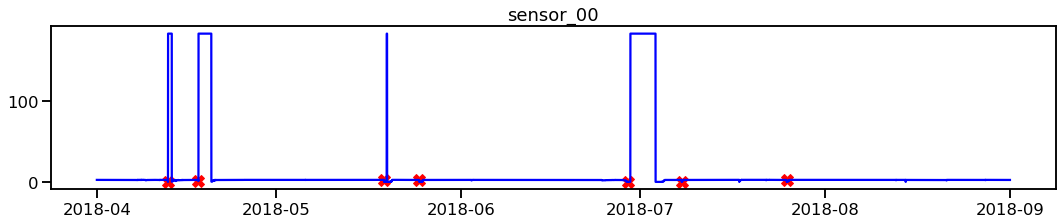

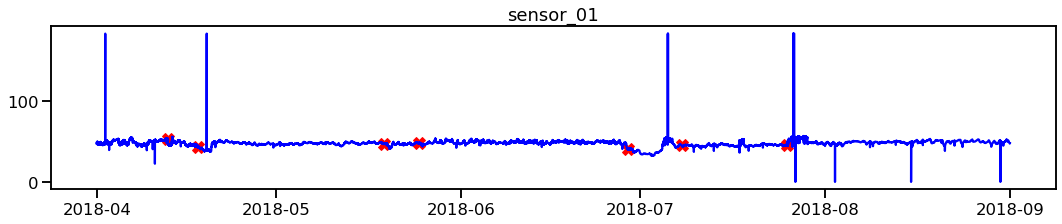

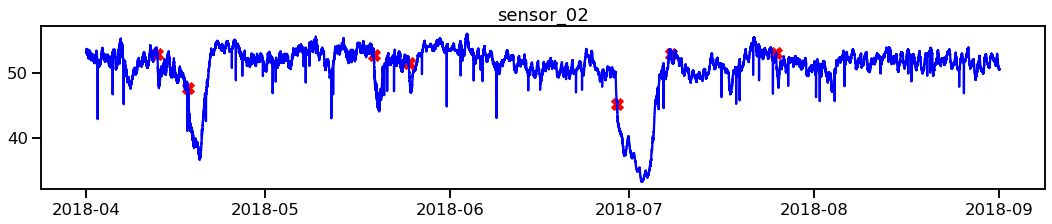

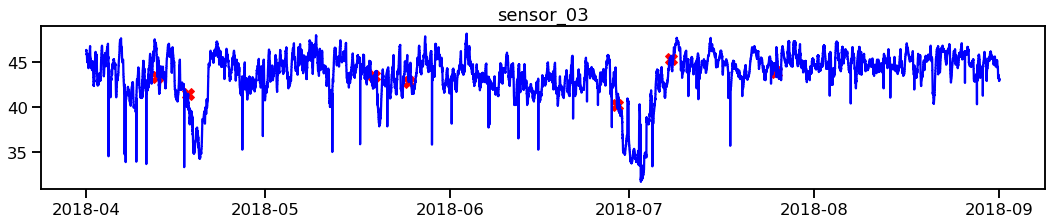

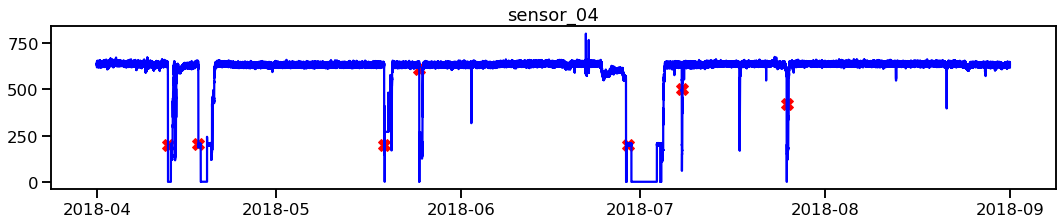

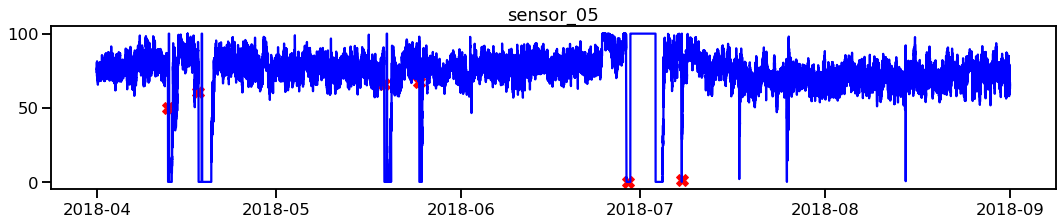

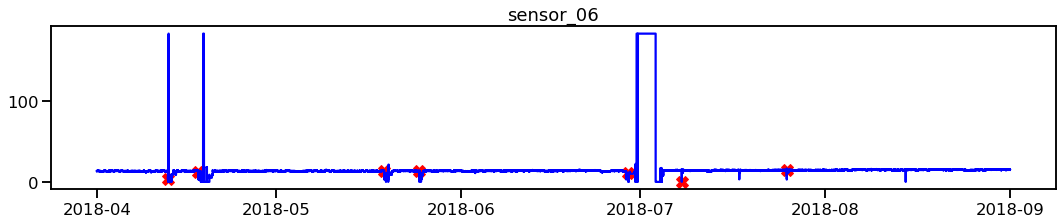

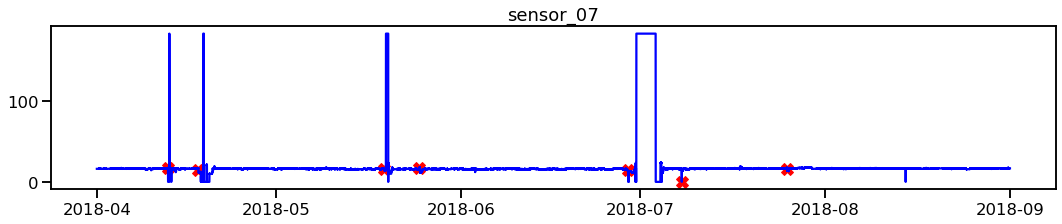

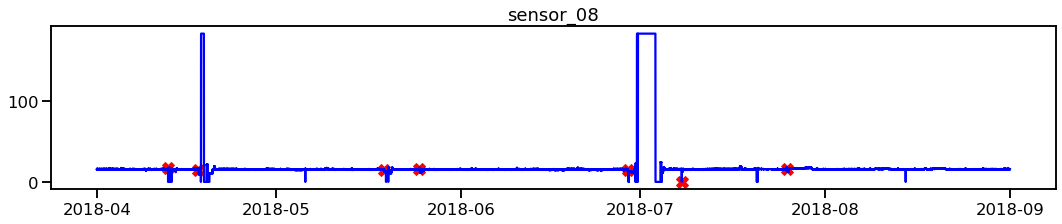

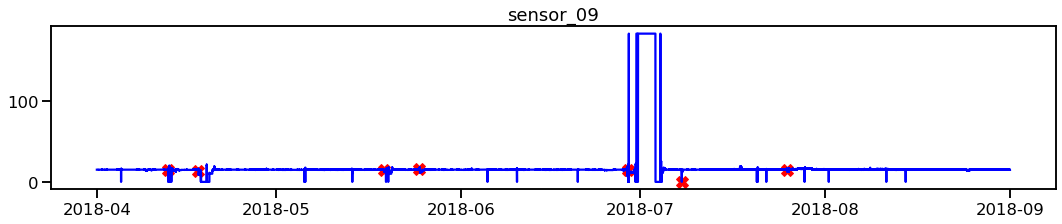

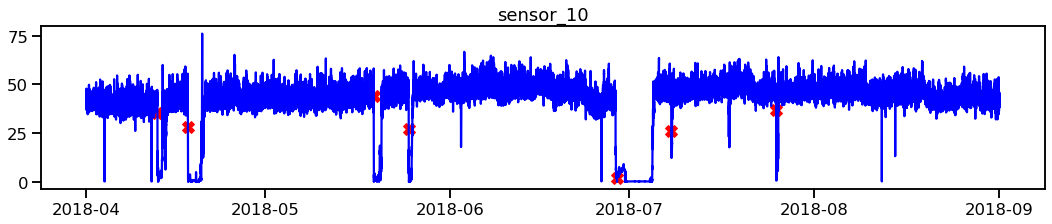

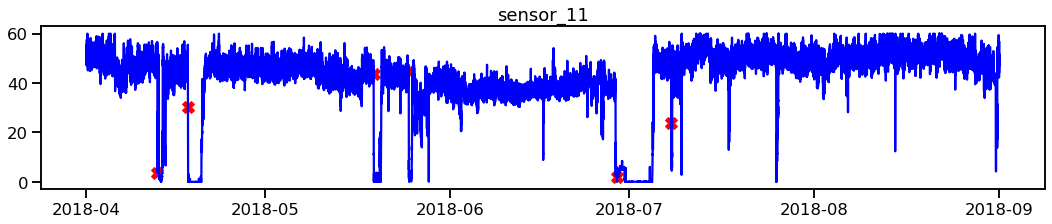

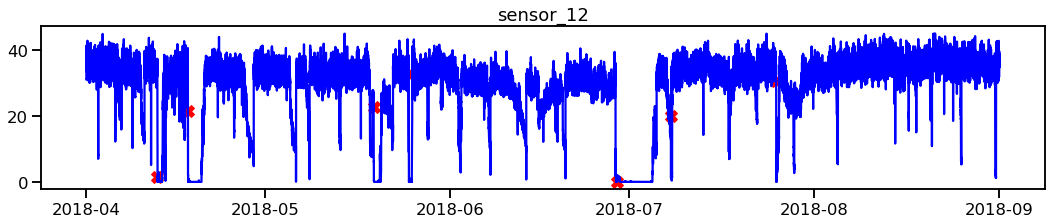

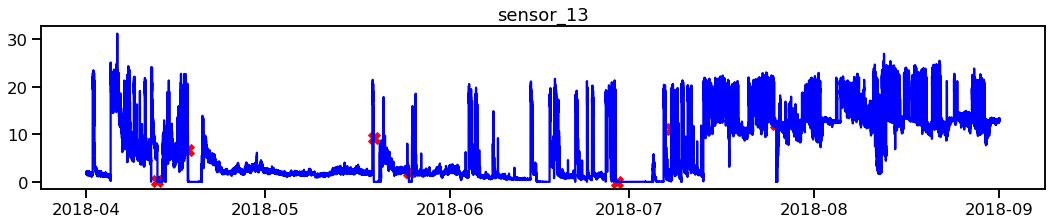

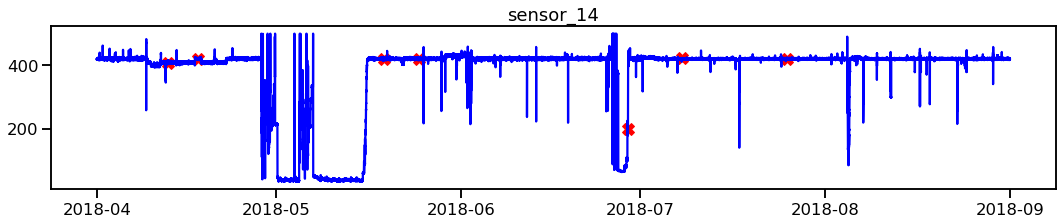

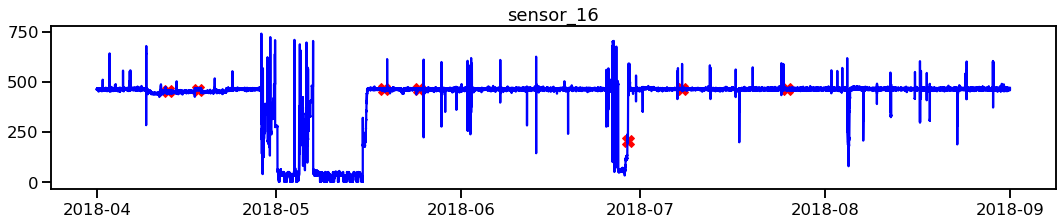

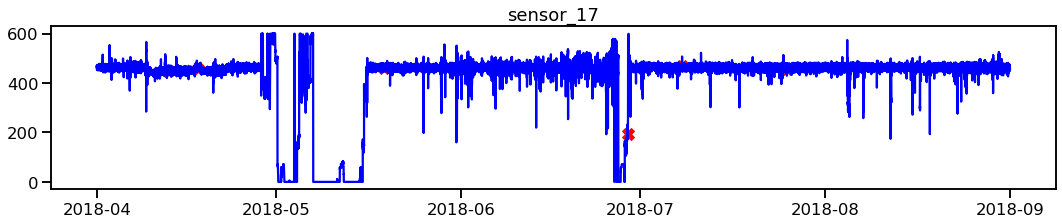

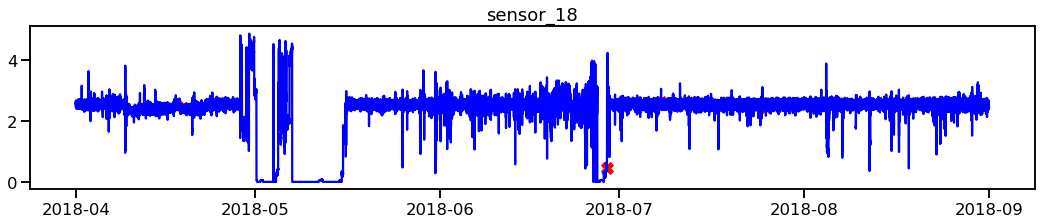

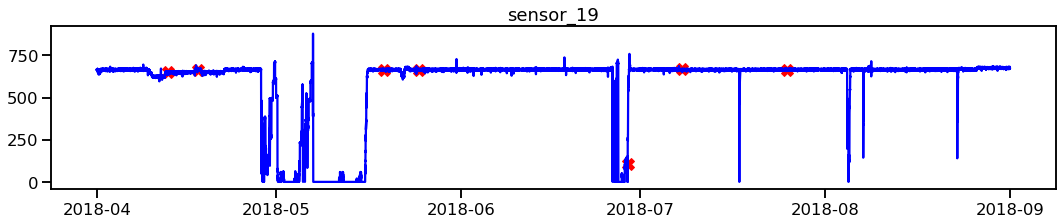

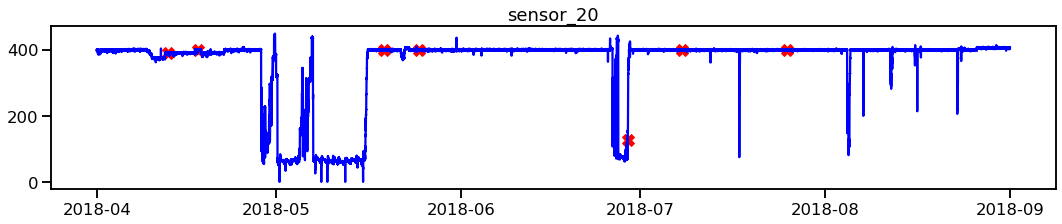

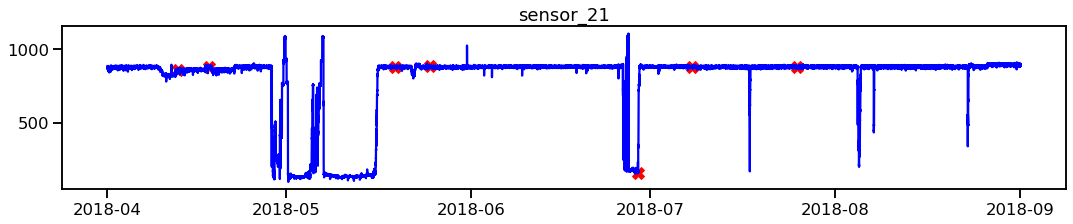

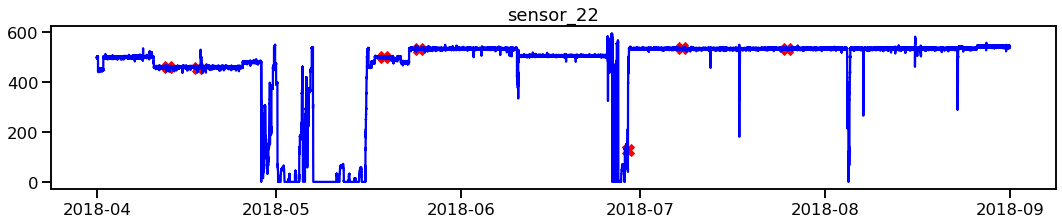

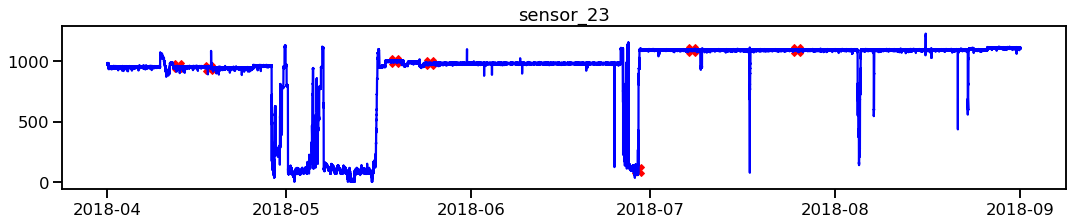

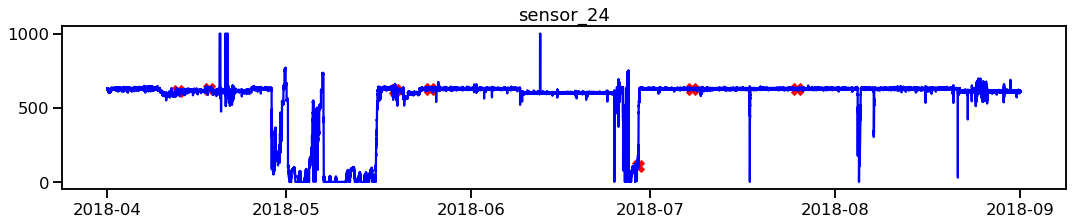

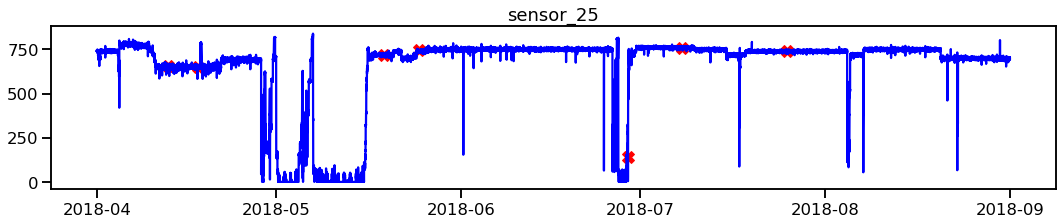

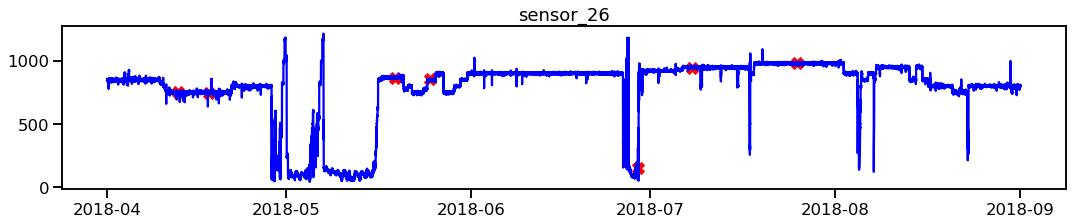

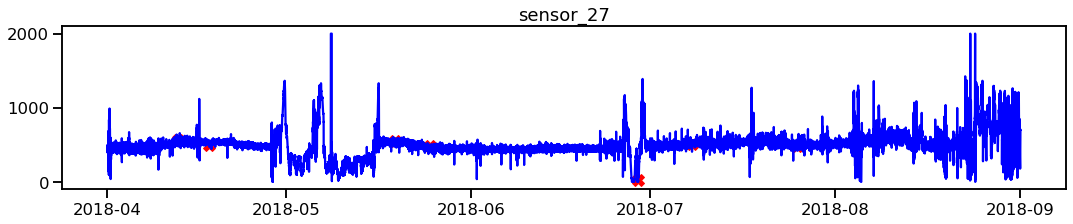

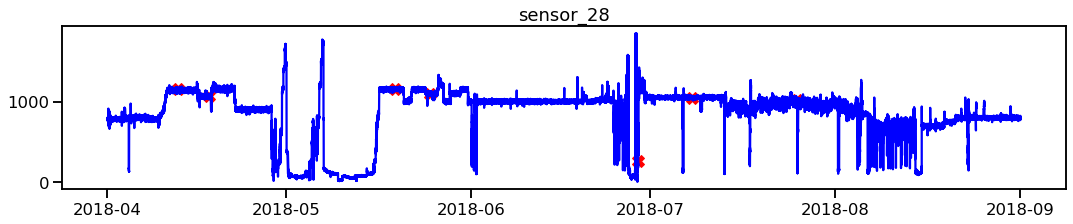

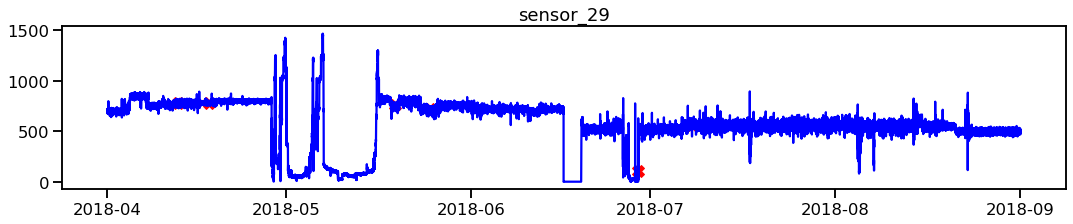

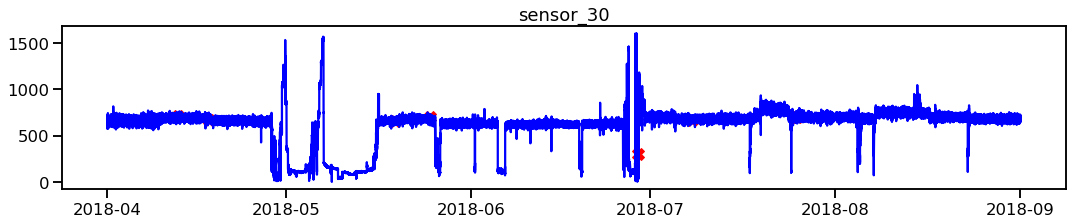

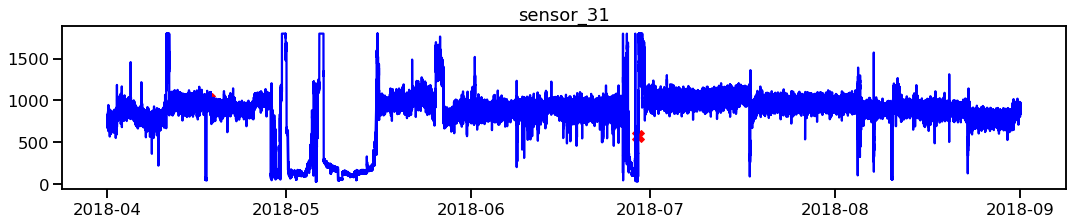

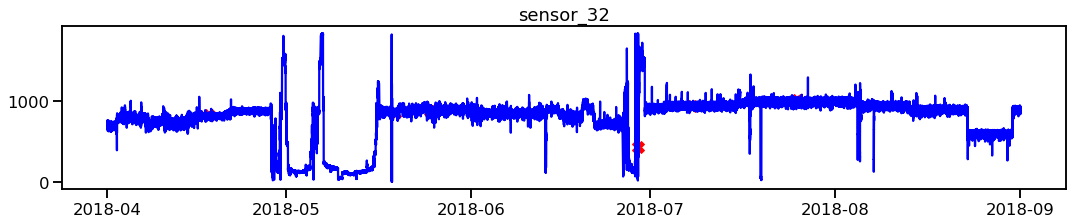

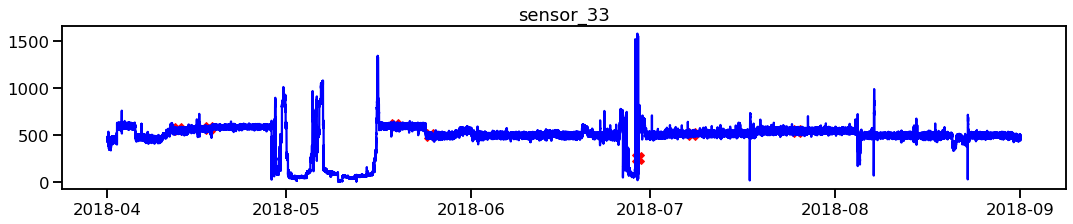

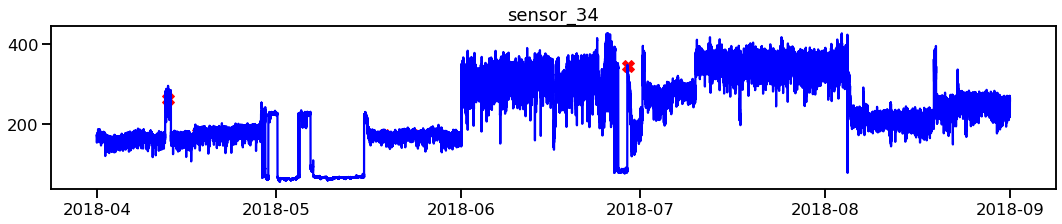

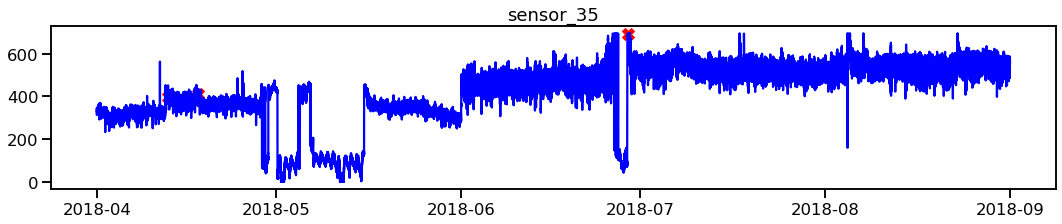

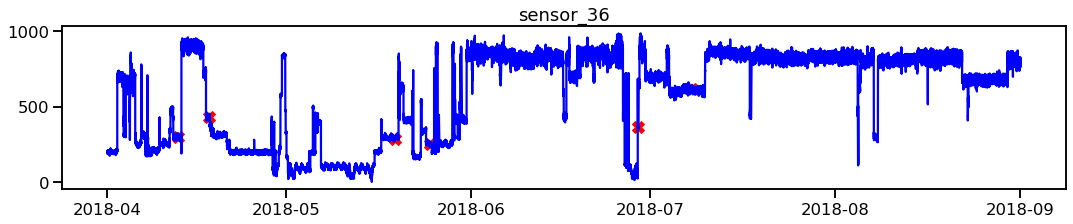

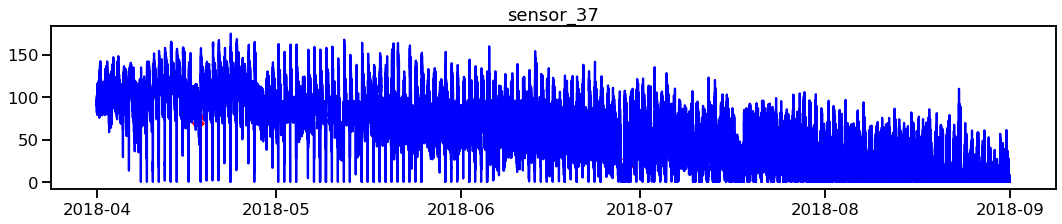

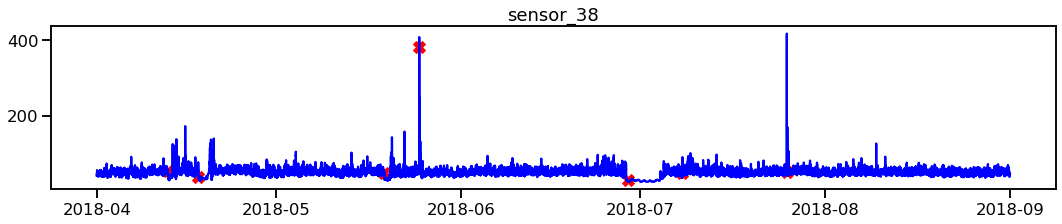

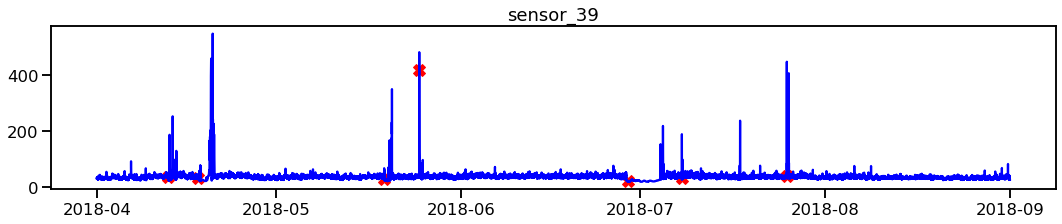

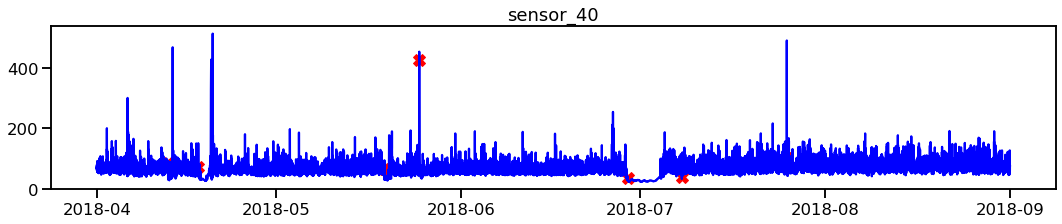

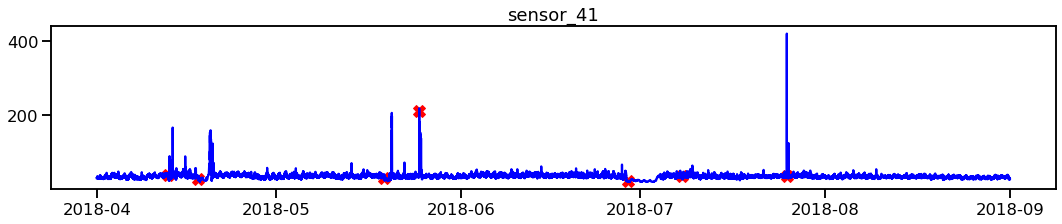

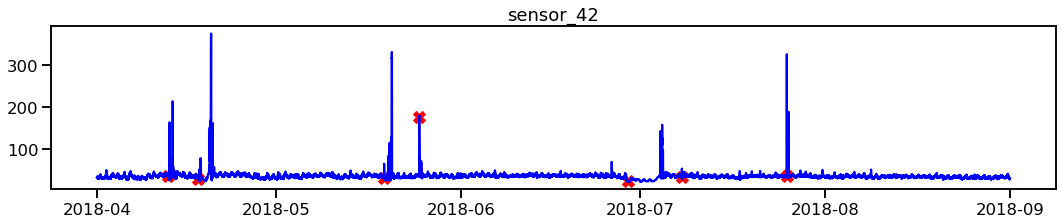

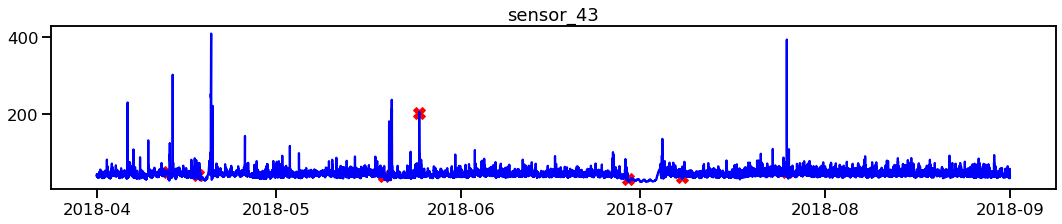

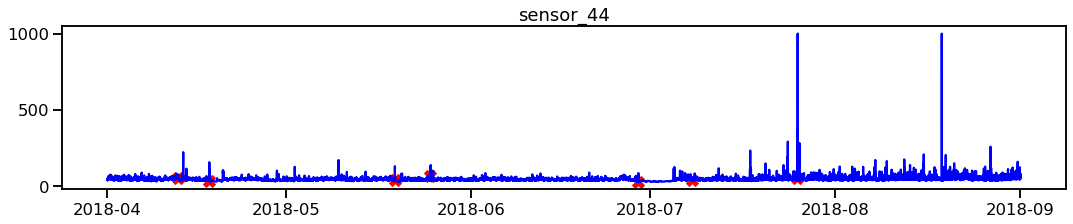

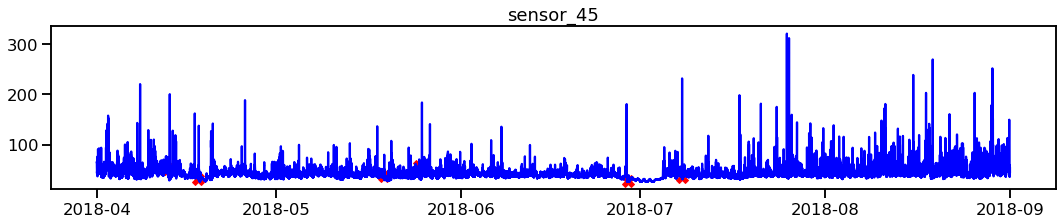

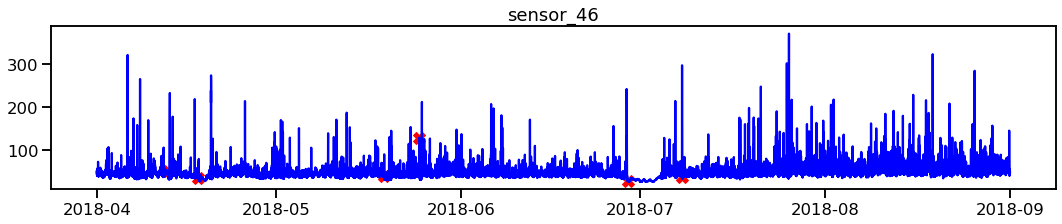

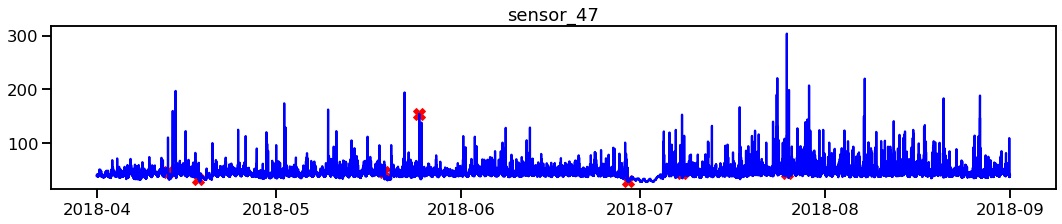

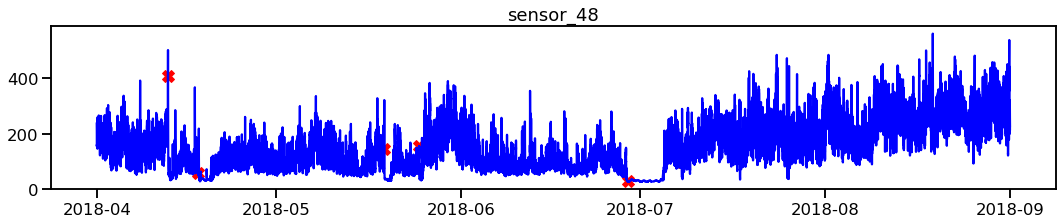

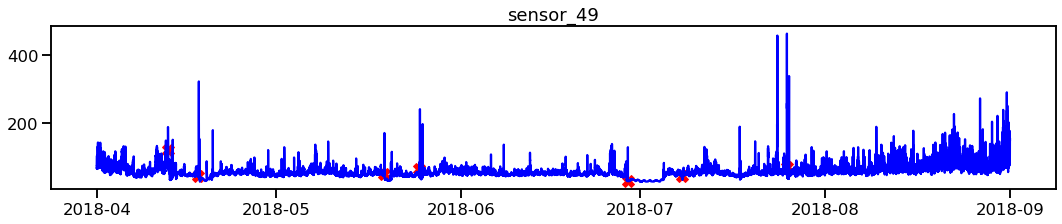

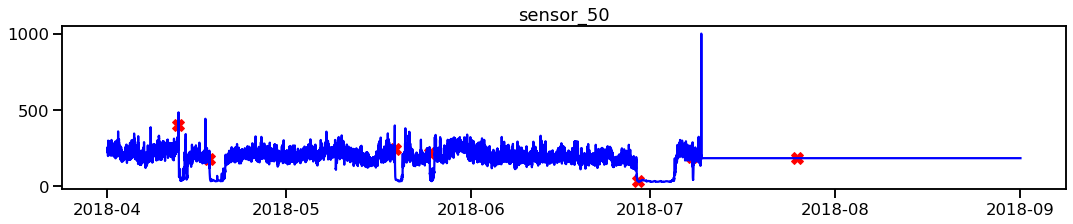

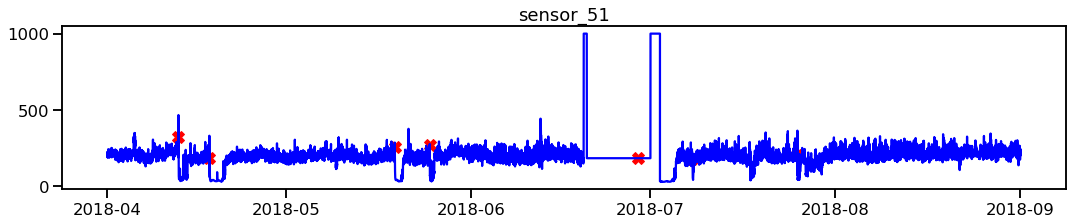

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

#create a dataset which only consists of those sensor reading which results in pump break.
df_broken = df[df['machine_status']=='BROKEN']
#extract column names of all the sensors
df_normal = df.drop(['machine_status'], axis=1)
sensor_names = df_normal.columns

for sensor in sensor_names:
    sns.set_context('talk')
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(df_broken[sensor], linestyle='none', marker='X', color='red', markersize=12)
    _ = plt.plot(df_normal[sensor], color='blue')
    _ = plt.title(sensor)
    plt.show()

We notice that, sensor readings are mostly constant apart from the times when the machine is marked "broken".

# Check if time-series data is stationery

A time series data is stationery if it does depend on time. In other words if the time series data changes with time, example a high reading in the morning and relatively low readings in the evening, this data is not stationery, and several procedures must be applied in order to make this data stationery. We can check this by visualising the mean and standard deviation of the sensor readings.
- We will first plot the rolling mean and rolling standard deviations and check if this remains constant.
- We will check them for all the sensor readings

In [17]:
#resample data into bins consisting of all readings of the respective day, and calculate the mean
#each row in resampled dataset will have the daily average reading
rollmean_sampled_daily = df.resample(rule='D').mean()
rollstd_sampled_daily = df.resample(rule='D').std()

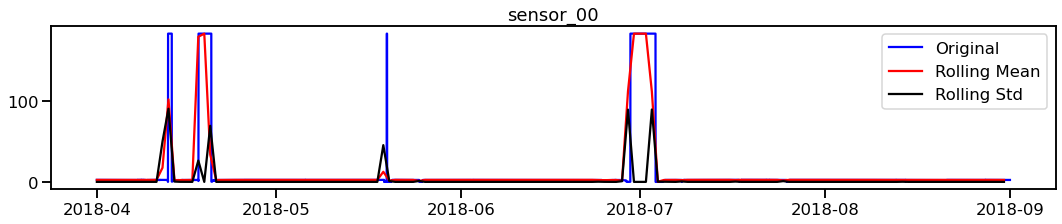

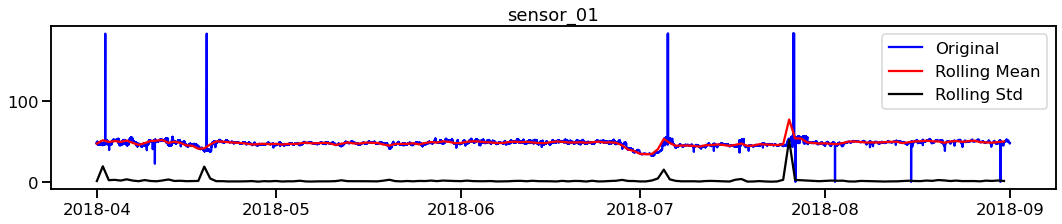

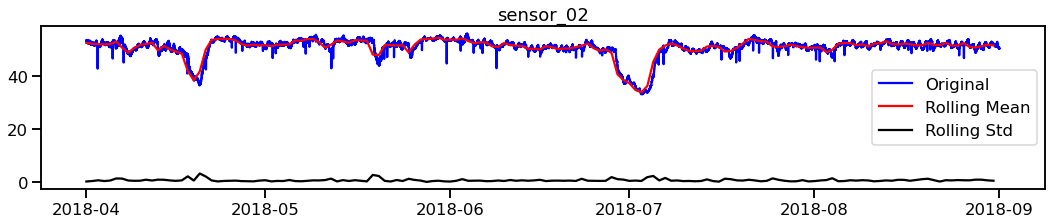

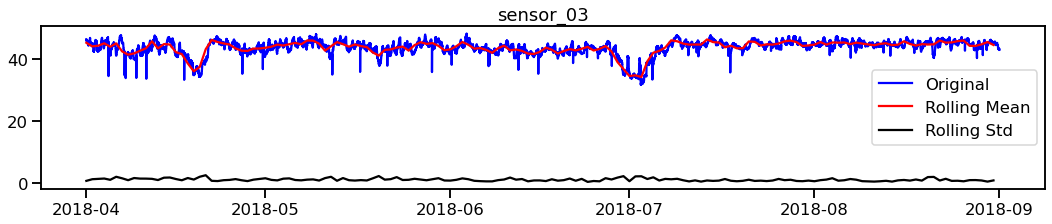

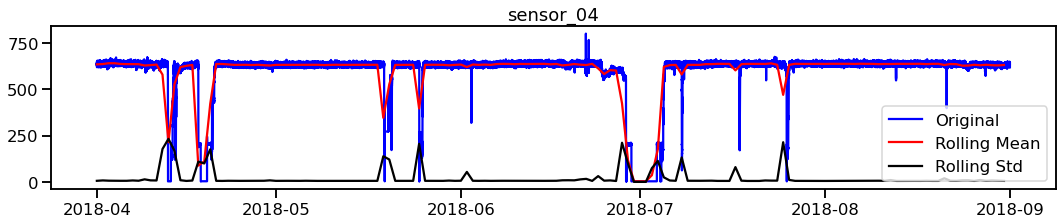

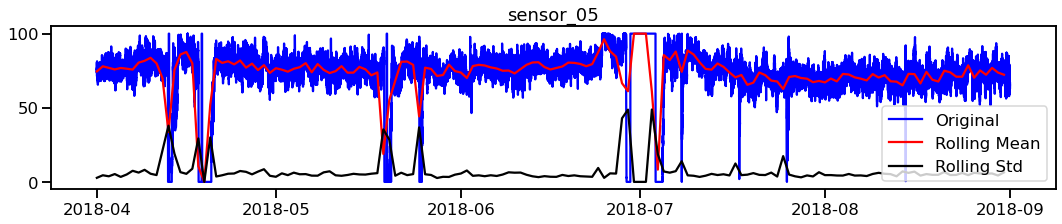

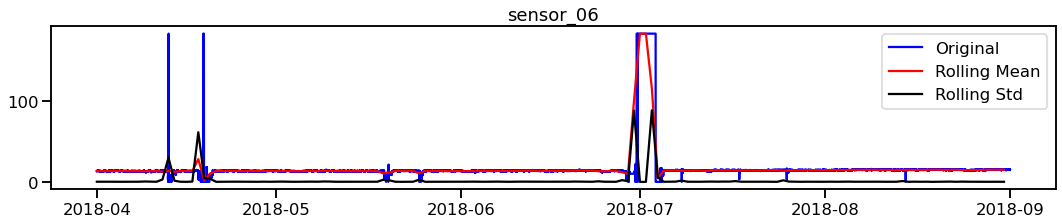

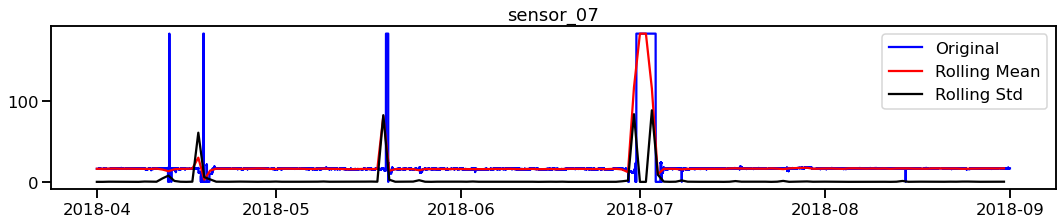

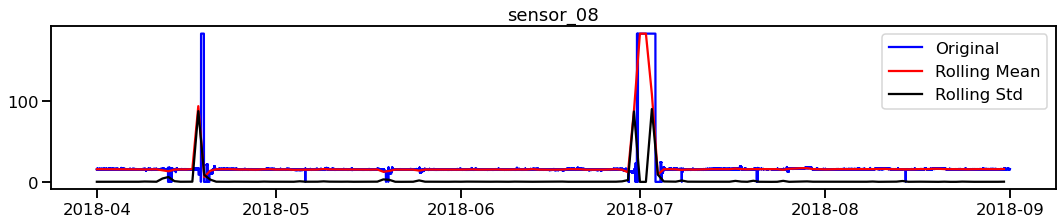

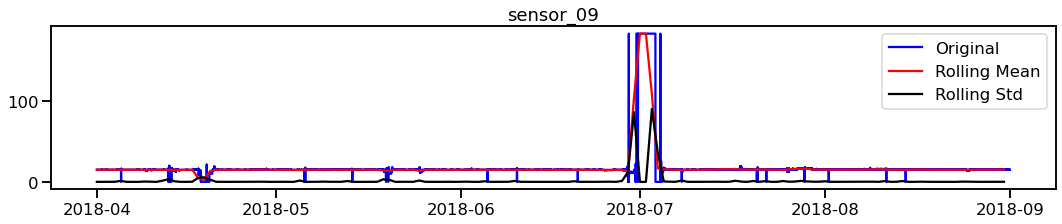

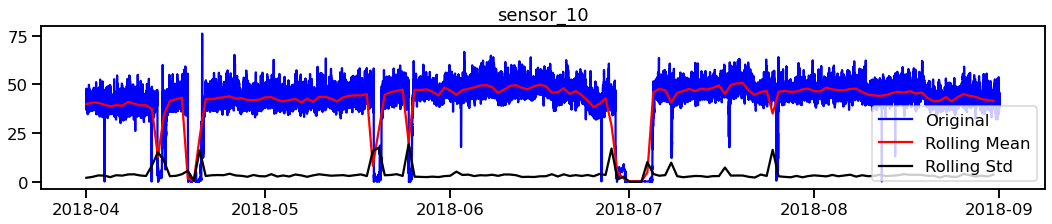

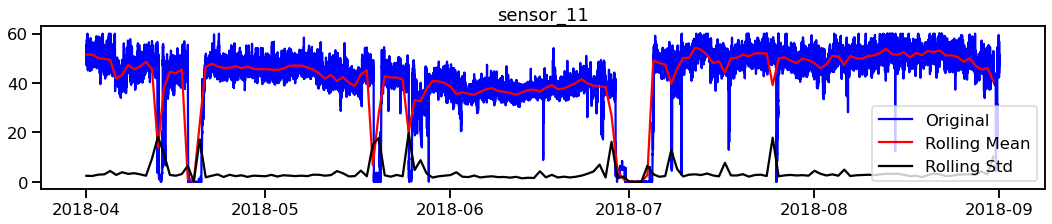

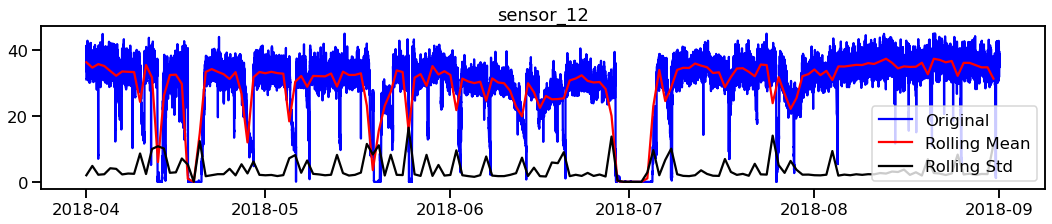

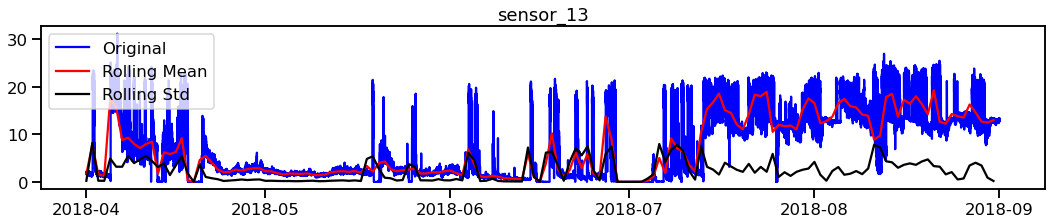

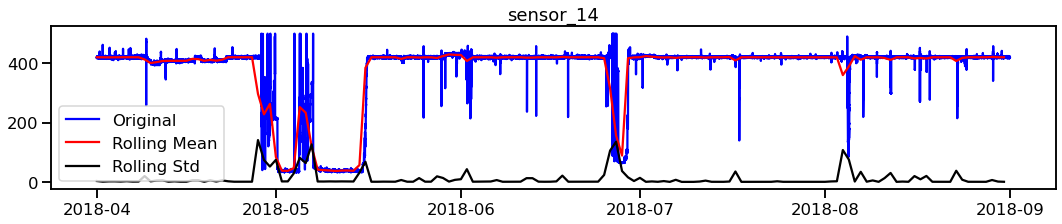

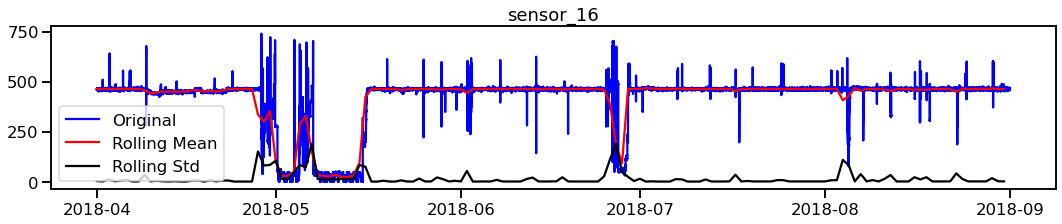

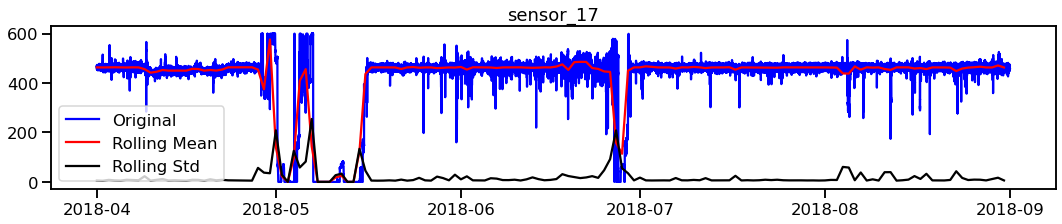

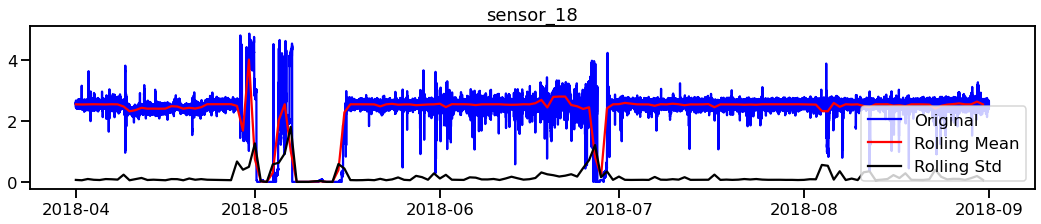

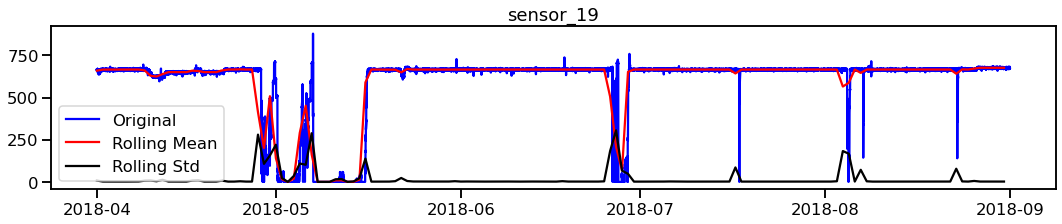

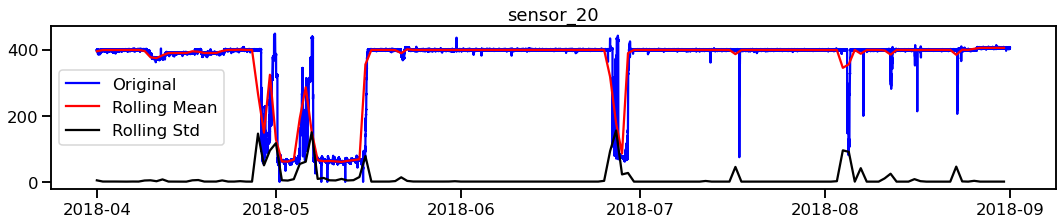

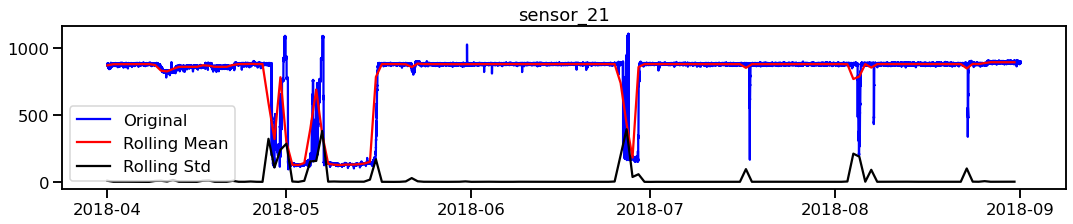

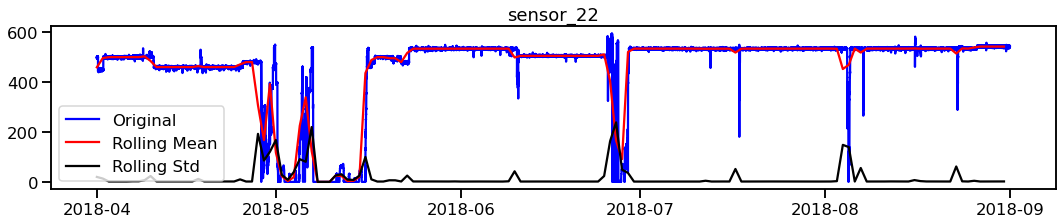

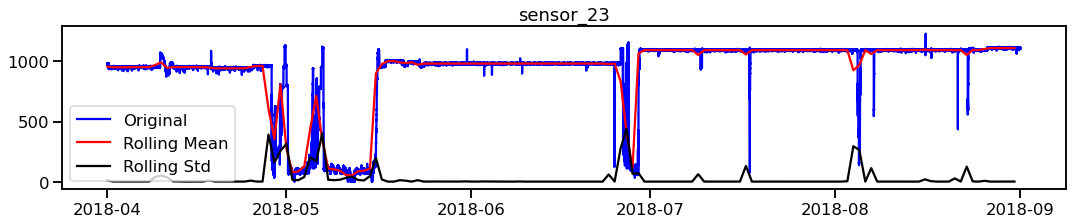

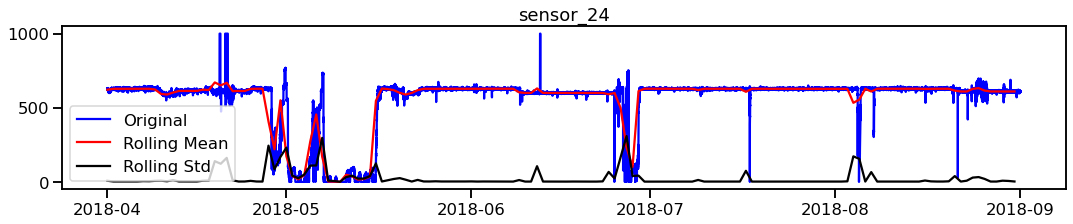

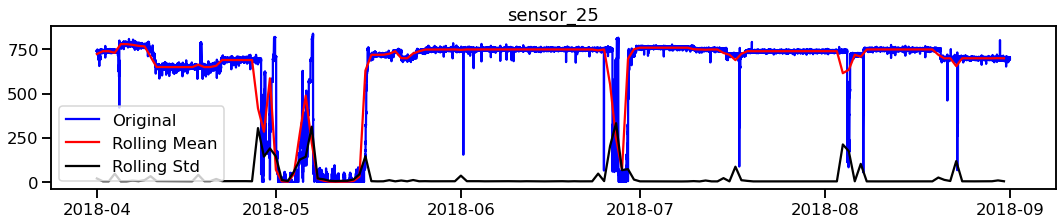

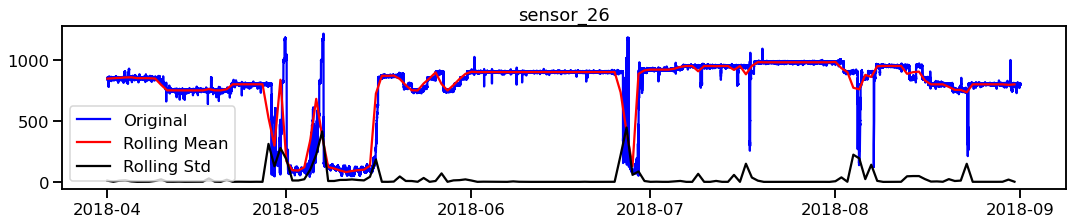

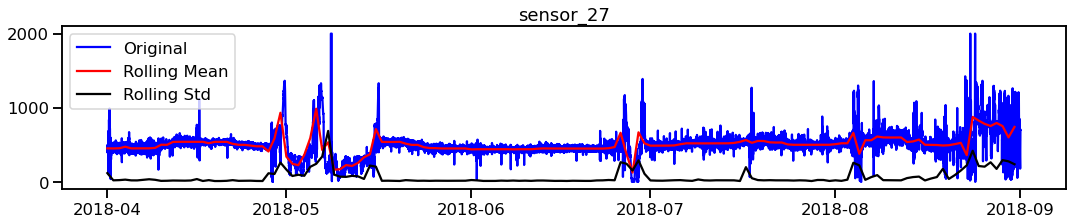

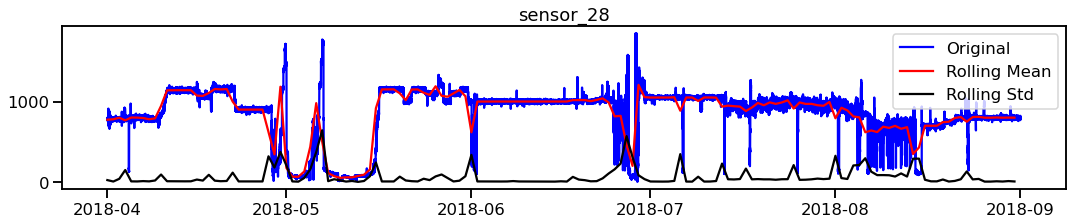

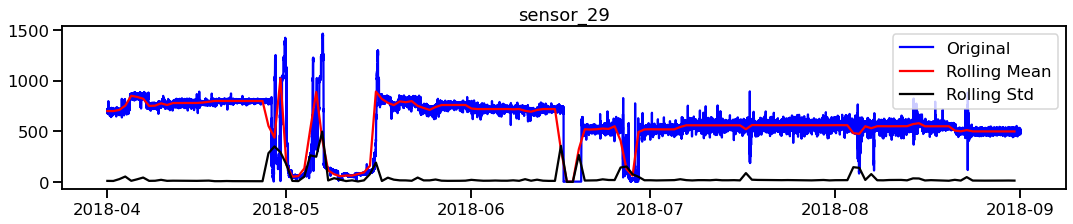

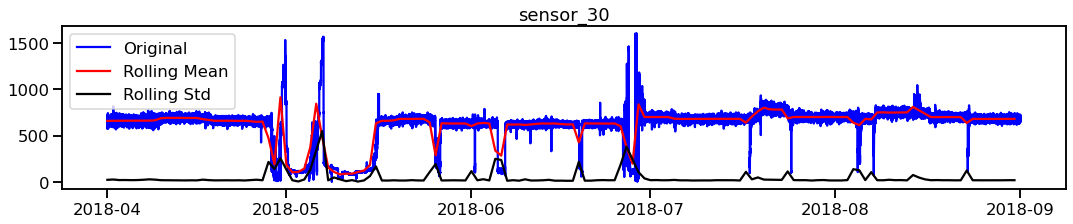

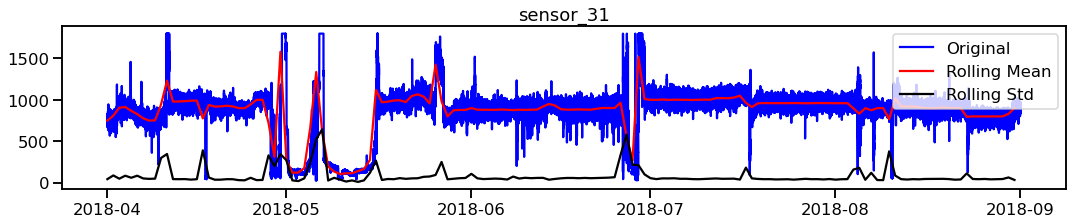

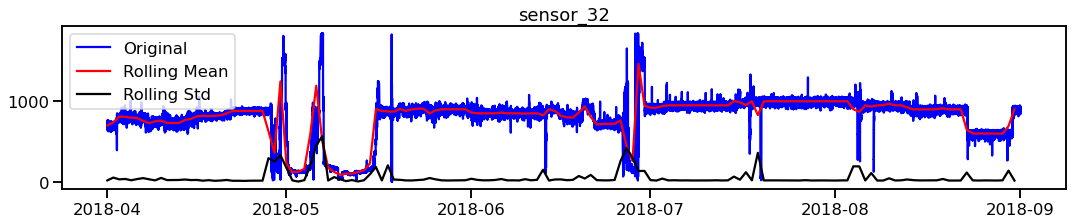

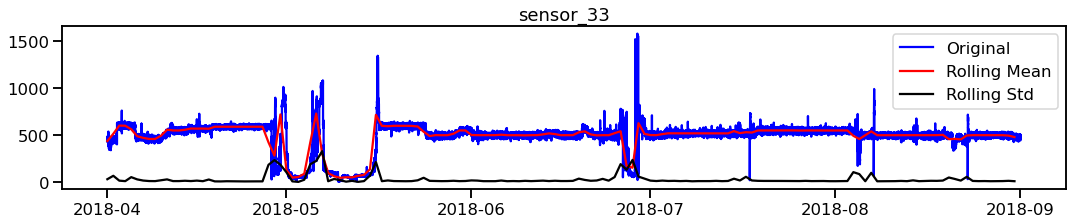

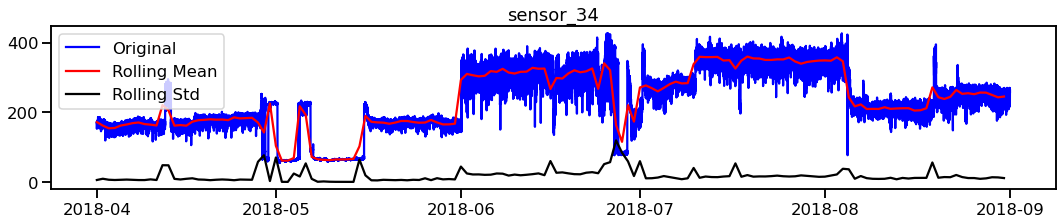

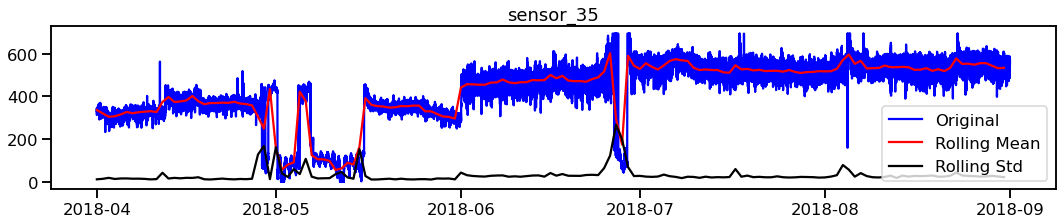

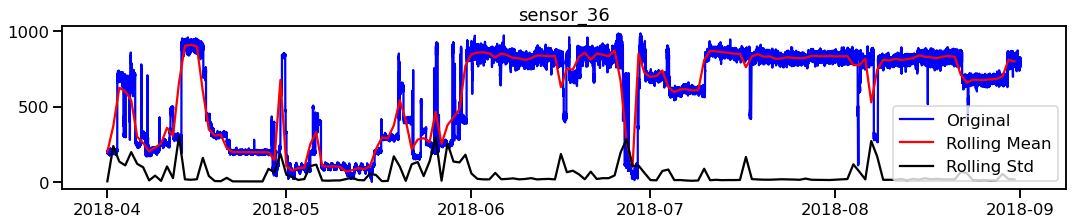

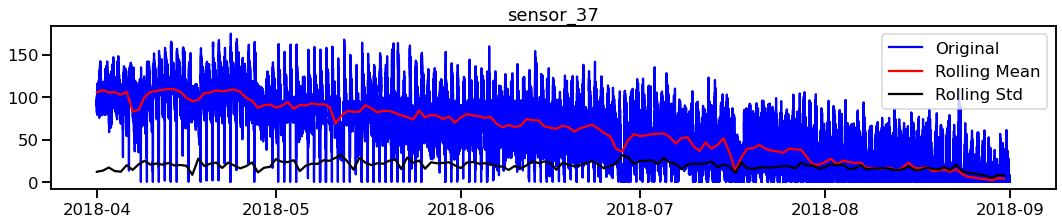

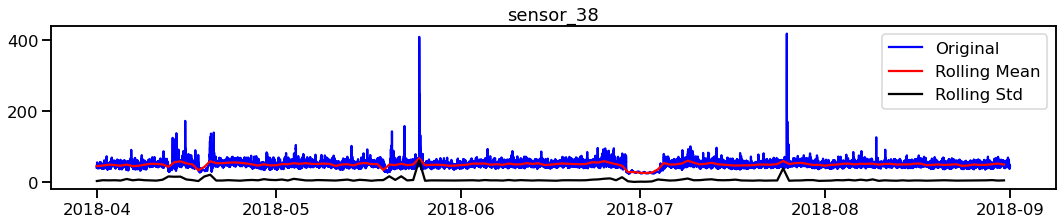

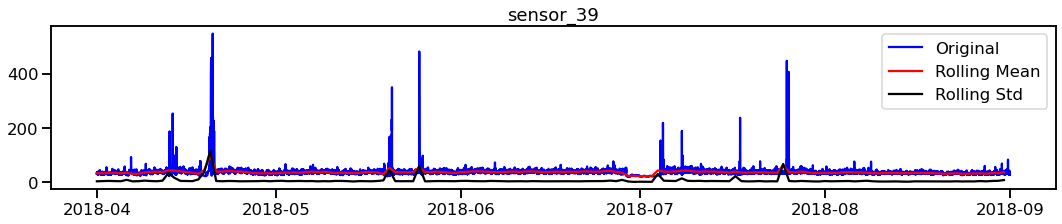

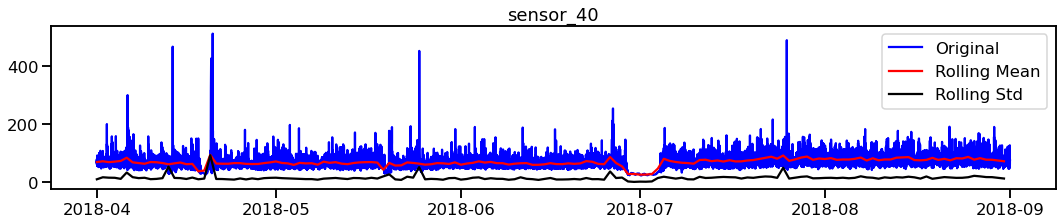

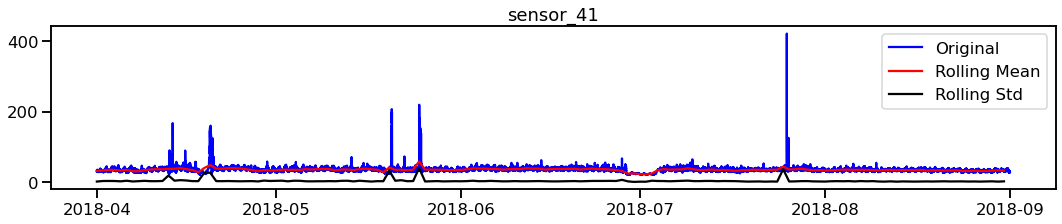

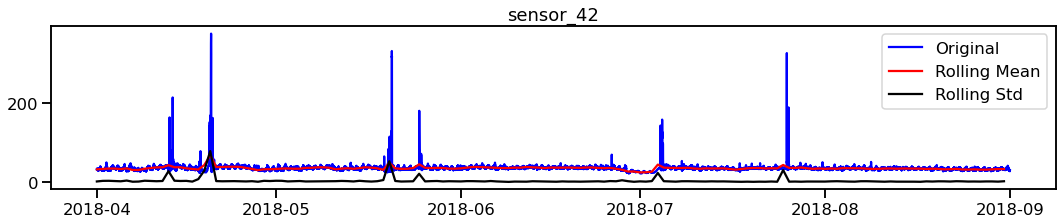

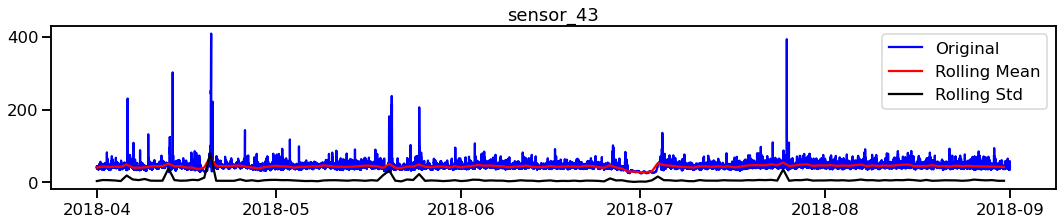

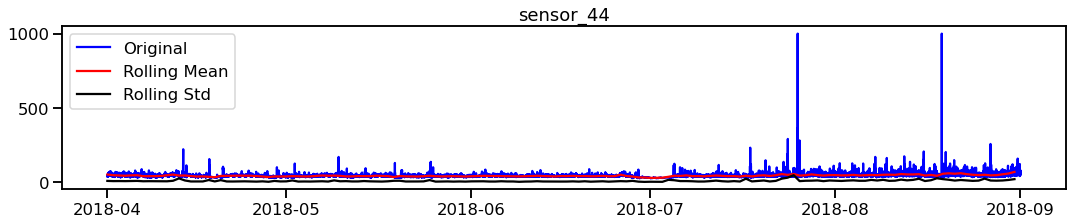

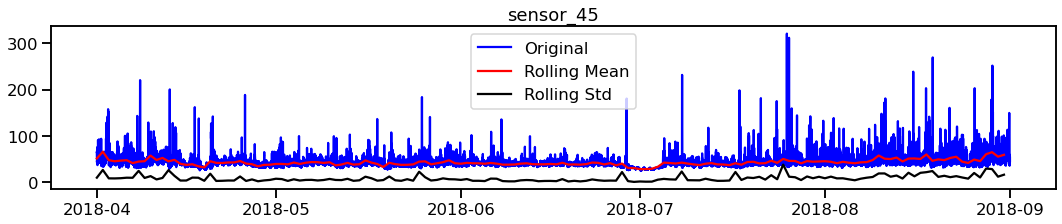

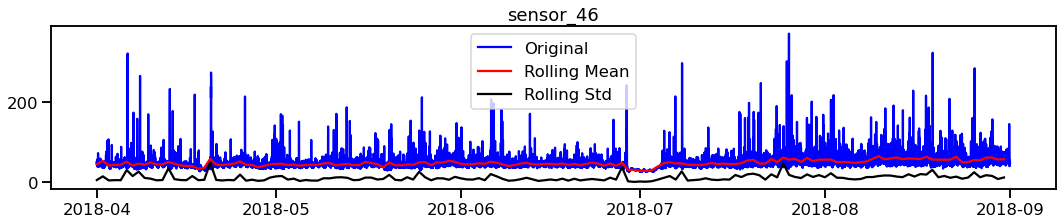

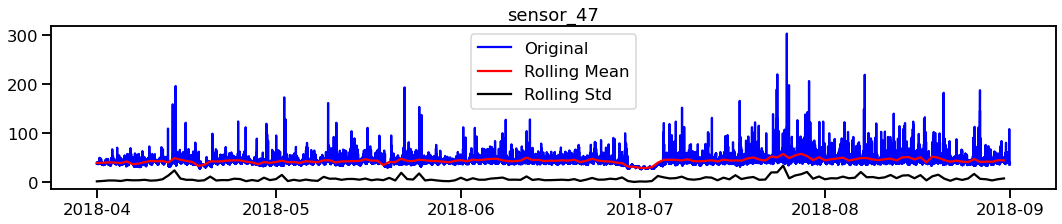

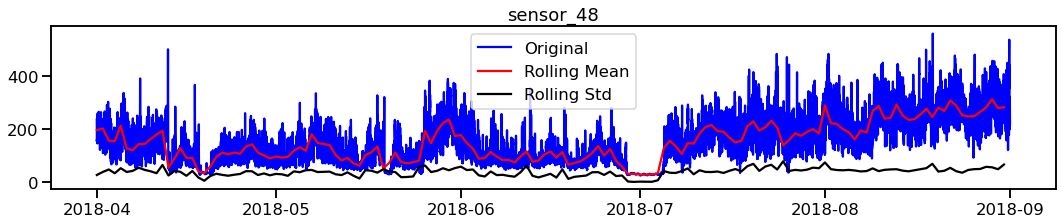

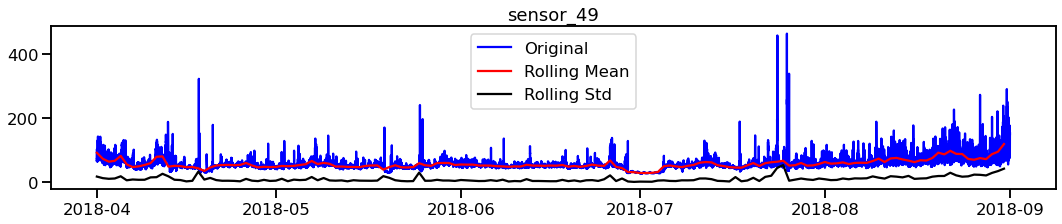

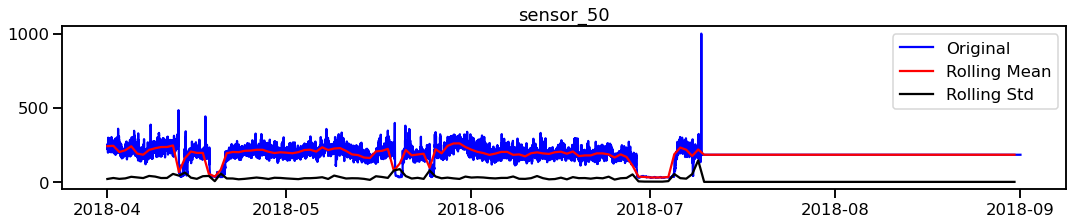

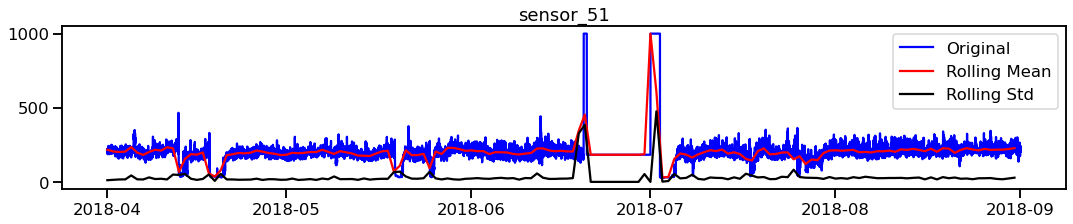

In [18]:
for sensor in sensor_names:
    plt.figure(figsize=(18,3))
    plt.plot(df[sensor], color='blue', label='Original')
    plt.plot(rollmean_sampled_daily[sensor], color='red', label='Rolling Mean')
    plt.plot(rollstd_sampled_daily[sensor], color='black', label='Rolling Std' )
    plt.legend(loc='best')
    plt.title(sensor)
    plt.show()

We note that for most of the sensors the mean and standard deviation of sensor readings is constant apart from the time where the pump is marked to be broken. Hence our time series data is constant.

# Feature selection using PCA

We have 52 features(52 sensor readings)in our dataset.Training our clustering alogithmn using all the features will be computational intensive. Therefore, we will use feature selection algorithm - Principal componenet analysis to derive the most important features which would explain our dataset the most.

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

#We have to standardise the data before applying PCA.
standard_scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(standard_scaler, pca)
pipeline.fit(df_normal)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

We will now visualise the Principal components in order to select that feature which explains maximum variability in the data.

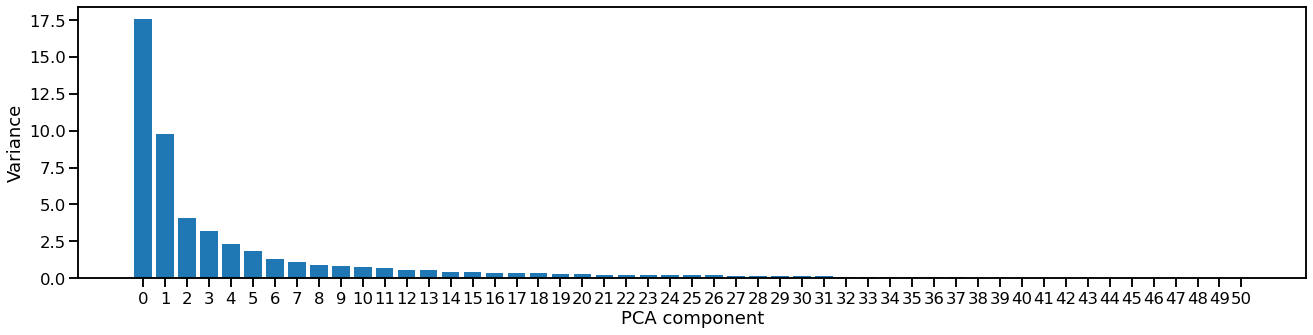

In [20]:
components = range(pca.n_components_)
plt.figure(figsize=(22, 5))
plt.bar(components, pca.explained_variance_)
plt.xlabel('PCA component')
plt.ylabel('Variance')
plt.xticks(components)
plt.show()

- We notice that first 2 components explain the maximum variance in the dataset. So we will proceed with first 2 components.
- We have to also check if these features are stationary. We will check this using "Dickey Fuller test".

In [21]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_normal)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

In [22]:
df['pc1']=pd.Series(principalDf['pc1'].values, index=df.index)
df['pc2']=pd.Series(principalDf['pc2'].values, index=df.index)

## Dickey Fuller test

- Null hypothesis : The data is not stationary.
- Alternate hypotheis : The data is stationary.
- We perform Dickey Fuller test at 5% significance level.

- We first find the difference between two consecutive values of time series data.Save this as our new data column.
- We fit a regressor model where the target variable is the difference column and independent variable is the time series data itself.
- We obtain the t-statistics and t-critical value.
- If the t-statistics is greater than t-critical(left tailed test), we will not be able to reject the null hypothesis.




In [23]:
!pip install statsmodels

In [24]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(principalDf['pc1'])
print("ADF statstic is {}".format(result[0]))
print("P-value {}".format(result[1]))

for significance_level, critical_value in result[4].items():
    print("{} : {}".format(significance_level,critical_value))
    

ADF statstic is -4.787398146934788
P-value 5.748658036626918e-05
1% : -3.4303797199796855
5% : -2.861553135844366
10% : -2.566776991736541


In [25]:
result = adfuller(principalDf['pc2'])
print("ADF statstic is {}".format(result[0]))
print("P-value {}".format(result[1]))

for significance_level, critical_value in result[4].items():
    print("{} : {}".format(significance_level,critical_value))

ADF statstic is -5.527159472217604
P-value 1.8217730518900326e-06
1% : -3.4303797201147583
5% : -2.8615531359040665
10% : -2.566776991768317


PC1:
- As the t-statistic -4.787 is lesser than critical value -2.861 we reject null hypothesis at 5% significance level.
- Hence we conclude that the data is stationery.

PC2:
- As the t-statistic -5.527 is lesser than critical value -2.861 we reject null hypothesis at 5% significance level.
- Hence we conclude that the data is stationery.

## Autocorrelation

Autocorrelation is checking if there is a relationship between the values of time series data and its lagged version. The value ranges from -1 to +1. +1 being positive autocorrelation and -1 being negative autocorrelation. We will now check if the data is autocorrelated.

- As both the correlation coefficient is close to 0 we conclude that there is no autocorrelation


In [26]:
pca1 = principalDf['pc1'].pct_change()
autocorrelation = pca1.dropna().autocorr()
print('Autocorrelation is: ', autocorrelation)

Autocorrelation is:  -0.00015029194919777318


In [27]:
pca2 = principalDf['pc2'].pct_change()
autocorrelation = pca2.autocorr()
print('Autocorrelation is: ', autocorrelation)

Autocorrelation is:  4.6782510473325455e-05


# Modeling

# IQR

We will use IQR (Inter quartile range) to detect the outliers in our principal components and plot it against our sensor readings. We will observe the position of outliers. If its position is just before the breakdown of pump, then this could act as a warning to the pump operator to take necessary action against it.

In [28]:
#Calculate the outliers in principal component 1
lowerQuantile_pc1, upperQuantile_pc1 = df['pc1'].quantile([0.25, 0.75])
iqr_pc1 = upperQuantile_pc1 - lowerQuantile_pc1
lowerBound_pc1 = lowerQuantile_pc1 - (1.5*iqr_pc1)
upperBound_pc1 = upperQuantile_pc1 + (1.5*iqr_pc1) 

#filter the outliers from pc1
df['anomaly_pc1'] = ((df['pc1']>upperBound_pc1) | (df['pc1']<lowerBound_pc1)).astype('int')

#we will calculate the percentage of anamolies in pc1
anomaly_count_pc1 = df['anomaly_pc1'].value_counts()
outliers_pc1 = anomaly_count_pc1[1]/len(df)
print("The outlier fraction in pc1 is {}".format(outliers_pc1))


The outlier fraction in pc1 is 0.13675516545821295


In [29]:
#Calculate the outliers in principal component 2
lowerQuantile_pc2, upperQuantile_pc2 = df['pc2'].quantile([0.25, 0.75])
iqr_pc2 = upperQuantile_pc2 - lowerQuantile_pc2
lowerBound_pc2 = lowerQuantile_pc2 - (1.5*iqr_pc2)
upperBound_pc2 = upperQuantile_pc2 + (1.5*iqr_pc2)

#filter the outliers from pc2
df['anomaly_pc2'] = ((df['pc2']>upperBound_pc2) | (df['pc2']<lowerBound_pc2)).astype('int')

#we will calculate the percentage of anamolies in pc2
anomaly_count_pc2 = df['anomaly_pc2'].value_counts()
outliers_pc2 = anomaly_count_pc2[1]/len(df)
print("The outlier fraction in pc2 is {}".format(outliers_pc2))

The outlier fraction in pc2 is 0.007323411292227734


# Feature selection

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

x = df.drop(['machine_status', 'pc1', 'pc2', 'anomaly_pc1', 'anomaly_pc2'], axis=1)
y = df['machine_status']

#We will normalise data using min-max scaling
normaliser = MinMaxScaler()
x_normalised = normaliser.fit_transform(x)

#We will select the most important 2 features from our dataset
best_sensorReadings = SelectKBest(score_func=chi2, k=2)
fit = best_sensorReadings.fit(x_normalised, y)

#Extract the scores
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(2, 'Score'))

     Feature          Score
0  sensor_00  110048.251493
7  sensor_07   12377.256761


In [33]:
a = df[df['anomaly_pc1'] == 1]
a

sensor_00  sensor_01  sensor_02  sensor_03   sensor_04  \
timestamp                                                                     
2018-04-01 09:45:00   2.466377  46.223960   52.25694  45.138890  628.703700   
2018-04-09 13:22:00   2.404398  47.786460   50.99826  42.491318  625.000000   
2018-04-28 12:31:00   2.438831  46.657990   51.43229  41.970486  627.430500   
2018-04-28 12:32:00   2.433912  46.657990   51.38889  41.970486  639.583300   
2018-04-28 12:33:00   2.438831  46.614580   51.43229  41.970486  633.449100   
...                        ...        ...        ...        ...         ...   
2018-08-23 07:02:00   2.503762  51.215275   53.12500  46.223960  638.078674   
2018-08-23 07:03:00   2.504745  51.215275   53.12500  46.223957  634.375000   
2018-08-23 07:04:00   2.507697  51.215275   53.12500  46.223957  637.847168   
2018-08-23 07:06:00   2.507697  51.215275   53.03819  46.223960  637.731445   
2018-08-23 07:07:00   2.504745  51.215275   53.12500  46.267360  647.916626   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
timestamp                                                                    
2018-04-01 09:45:00   75.65549   13.31742   16.12413   15.90712   15.08247   
2018-04-09 13:22:00   88.18405   13.12211   15.74797   15.07523   14.53993   
2018-04-28 12:31:00   69.28004   13.12211   16.39178   15.07523   15.12587   
2018-04-28 12:32:00   68.67373   13.20168   16.32668   14.98843   15.01013   
2018-04-28 12:33:00   69.05336   13.05700   16.34115   15.14757   15.11863   
...                        ...        ...        ...        ...        ...   
2018-08-23 07:02:00   70.85037   14.82928   16.12413   15.65393   15.16204   
2018-08-23 07:03:00   70.62901   14.82928   16.16753   15.73351   15.08247   
2018-08-23 07:04:00   73.14016   14.93779   16.20370   15.69734   15.06076   
2018-08-23 07:06:00   68.50497   14.85822   16.16753   15.65393   15.11863   
2018-08-23 07:07:00   69.63721   14.89439   16.16753   15.76968   15.08247   

                     ...  sensor_47  sensor_48  sensor_49  sensor_50  \
timestamp            ...                                               
2018-04-01 09:45:00  ...  40.509258  219.61810  114.29400  263.59950   
2018-04-09 13:22:00  ...  46.006943  144.96530   54.68750  207.46530   
2018-04-28 12:31:00  ...  35.300930   98.66898   59.60648  185.76390   
2018-04-28 12:32:00  ...  35.879630   97.51157   59.89583  187.78940   
2018-04-28 12:33:00  ...  36.168980   96.93287   60.76389  188.65740   
...                  ...        ...        ...        ...        ...   
2018-08-23 07:02:00  ...  40.798611  258.96990   98.66898  183.04926   
2018-08-23 07:03:00  ...  40.798610  258.68050  102.71990  183.04926   
2018-08-23 07:04:00  ...  40.509258  257.52310  105.90280  183.04926   
2018-08-23 07:06:00  ...  39.641200  270.83330  108.79630  183.04926   
2018-08-23 07:07:00  ...  39.641200  283.27550  109.95370  183.04926   

                     sensor_51  machine_status          pc1         pc2  \
timestamp                                                                 
2018-04-01 09:45:00   209.7801          NORMAL   239.084800  188.613364   
2018-04-09 13:22:00   227.4306          NORMAL   336.821943  132.420294   
2018-04-28 12:31:00   237.5579          NORMAL  1220.042101 -390.040298   
2018-04-28 12:32:00   238.7153          NORMAL   615.337325 -116.308045   
2018-04-28 12:33:00   239.8727          NORMAL   452.651638   -6.986238   
...                        ...             ...          ...         ...   
2018-08-23 07:02:00   240.1620          NORMAL   386.044552 -153.685535   
2018-08-23 07:03:00   239.0046          NORMAL   346.881669 -149.412008   
2018-08-23 07:04:00   237.5579          NORMAL   241.810916 -172.565609   
2018-08-23 07:06:00   238.4259          NORMAL   251.276096 -195.292205   
2018-08-23 07:07:00   239.8727          NORMAL   236.838440 -193.180508   

                     anomaly_pc1  anomaly_pc2  
timestamp        

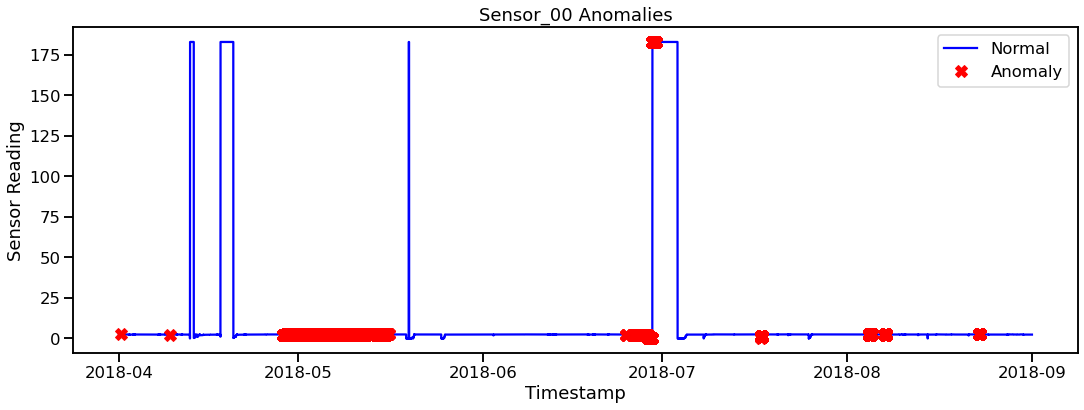

In [34]:
# We will plot outliers from both pc1 and pc2 on sensor_00 
#pc1
anomaly = df[df['anomaly_pc1'] == 1] #anomaly
plt.figure(figsize=(18,6))
plt.plot(df['sensor_00'], color='blue', label='Normal')
plt.plot(anomaly['sensor_00'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
plt.xlabel('Timestamp')
plt.ylabel('Sensor Reading')
plt.title('Sensor_00 Anomalies')
plt.legend(loc='best')
plt.show()

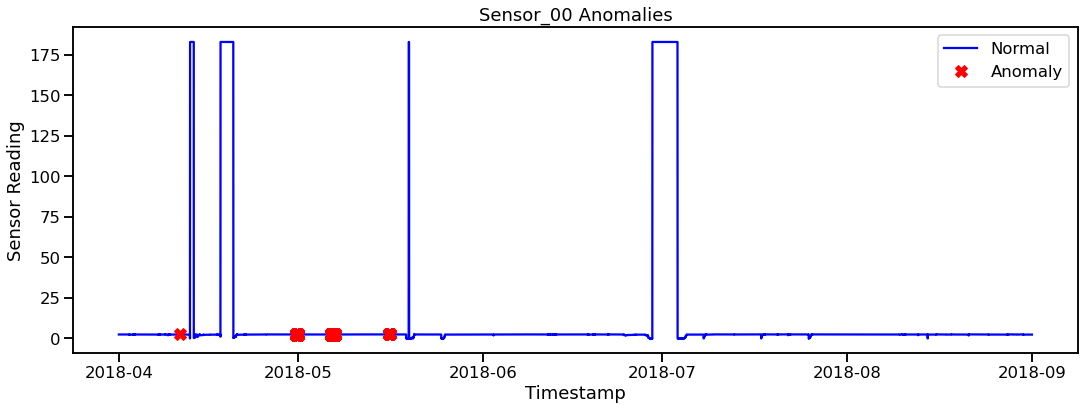

In [35]:
# we will plot anamolies from pc2 on sensor_00 readings
anomaly = df[df['anomaly_pc2'] == 1] #anomaly
plt.figure(figsize=(18,6))
plt.plot(df['sensor_00'], color='blue', label='Normal')
plt.plot(anomaly['sensor_00'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
plt.xlabel('Timestamp')
plt.ylabel('Sensor Reading')
plt.title('Sensor_00 Anomalies')
plt.legend(loc='best')
plt.show()

When we comapre both the plots, we observe that,
- PC1 better explains the anomalies when compared to PC2
- This serves as a valuable information which can be used to notify the pump operator and prevent any kind of hazaradous situation.

# k-nearest neighbours

## Step 1
- We will initialise k nearest neighbour algorithm with 2 clusters- Normal and Not normal(broken,recovering)
- We will try to find 2 clusters among our principal components pc1 and pc2
- We will initialise our cluster with lables (0 and 1 here) and number of elements in each label

In [36]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(principalDf.values)
labels = kmeans.predict(principalDf.values)
unique_elements, counts_elements = np.unique(labels, return_counts=True)
clusters = np.asarray((unique_elements, counts_elements))

In [37]:
#centroid of both the clusters
kmeans.cluster_centers_

array([[-2.77186239e+02,  2.06441042e+00],
       [ 2.30932129e+03, -1.71992194e+01]])

In [38]:
kmeans.labels_[100]-1

-1

In [39]:
kmeans.cluster_centers_[kmeans.labels_[0]-1]

array([2309.32129164,  -17.19921941])

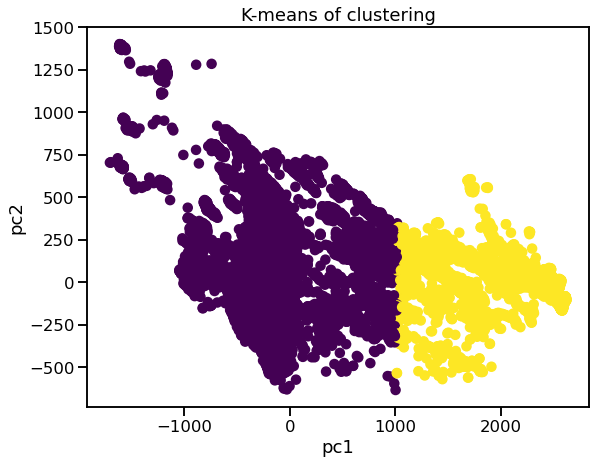

In [40]:
# visualise the clusters
plt.figure(figsize=(9,7))
plt.scatter(principalDf['pc1'], principalDf['pc2'], c=labels)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('K-means of clustering')
plt.show()

## Step 2
- We will calculate centroid of these two clusters.
- Use a function to calculate distance between each point of pc1 and pc2 to the farthest centroids as we aim to find the largest distance between the point and either of centroids.
- calculate threshold
- if the distance is greater than the threshold we mark it as outlier/anomaly

In [41]:
# Write a function that calculates distance between each point and the centroid of the closest cluster
def getDistanceByPoint(data, model):
   
    distance = []
    for i in range(0,len(data)):
        # data location from principal componets
        Xa = np.array(data.loc[i])
        #returns the cluster centroid of the cluster. If lable is 0 of a point in pc1 and it belongs to cluster0, it returns the centroid of cluster1
        #if points at index 0 is marked label 0 by kmeans, then cluster_centers[-1] that is last centroid entry will be chosen, if label is 1 then first centroid will be chosen
        #so we are here calculating the distance from each point to the farthest centroid, or the centroid of the cluster to which the respective point doesnt belong to
        #if this distance is greater than threshold then it is marked as anomaly!
        Xb = model.cluster_centers_[model.labels_[i]-1]
        #euclidean distance
        distance.append(np.linalg.norm(Xa-Xb))
    return pd.Series(distance, index=data.index)

In [42]:
principalDf

pc1         pc2
0        70.386555  265.227482
1        70.386555  265.227482
2        28.619681  282.908344
3        25.287679  289.659667
4        30.436034  294.132551
...            ...         ...
220111 -308.019993 -274.906704
220112 -294.061399 -256.643449
220113 -299.691225 -257.249186
220114 -284.622144 -263.428359
220115 -297.656264 -264.885130

[220116 rows x 2 columns]

In [43]:
# As obtained previously from IQR analysis, the outlier fraction of pc1 is 0.13
outliers_fraction = 0.13

# Calculate distance between each point of principal component and to the farthest centroid of the cluster
distance = getDistanceByPoint(principalDf, kmeans)

#Calculate 13% of outliers in our entire dataset 
number_of_outliers = int(outliers_fraction*len(distance))

# find out the minimum distance among 13% of largest values in distances.
threshold = distance.nlargest(number_of_outliers).min()

# if the distance is greater than threshold, then that point is marked as anomaly
principalDf['anomaly_kmeans'] = (distance >= threshold).astype(int)

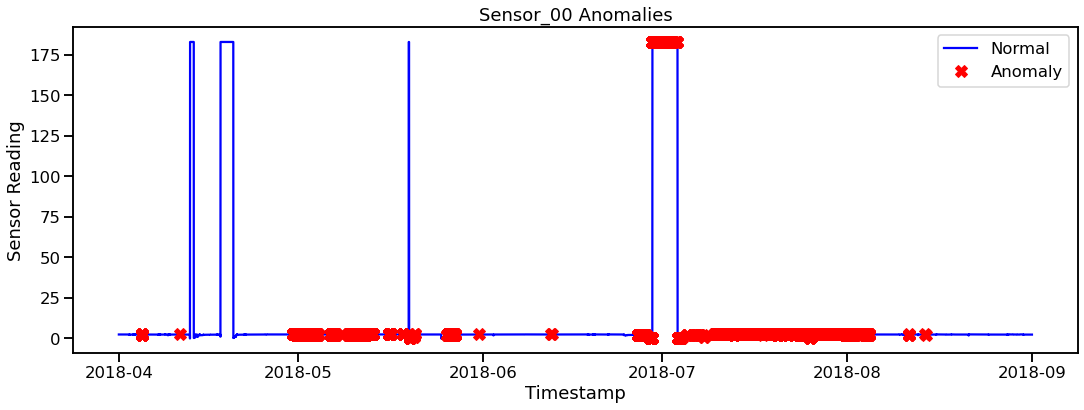

In [44]:
df['anomaly_kmeans'] = pd.Series(principalDf['anomaly_kmeans'].values, index=df.index)
anomaly = df[df['anomaly_kmeans'] == 1] 
plt.figure(figsize=(18,6))
plt.plot(df['sensor_00'], color='blue', label='Normal')
plt.plot(anomaly['sensor_00'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
plt.xlabel('Timestamp')
plt.ylabel('Sensor Reading')
plt.title('Sensor_00 Anomalies')
plt.legend(loc='best')
plt.show()

On closely observing the plot above, we can clearly see that the k means clustering recognises the anomalies in sensor_00 readings along with few false positives.

# Isolation forest

In [45]:
from sklearn.ensemble import IsolationForest

outliers_fraction = 0.13 #obtained by IQR analysis
model =  IsolationForest(contamination=outliers_fraction)
model.fit(principalDf.values) 
principalDf['anomaly_IsolationForest'] = pd.Series(model.predict(principalDf.values))

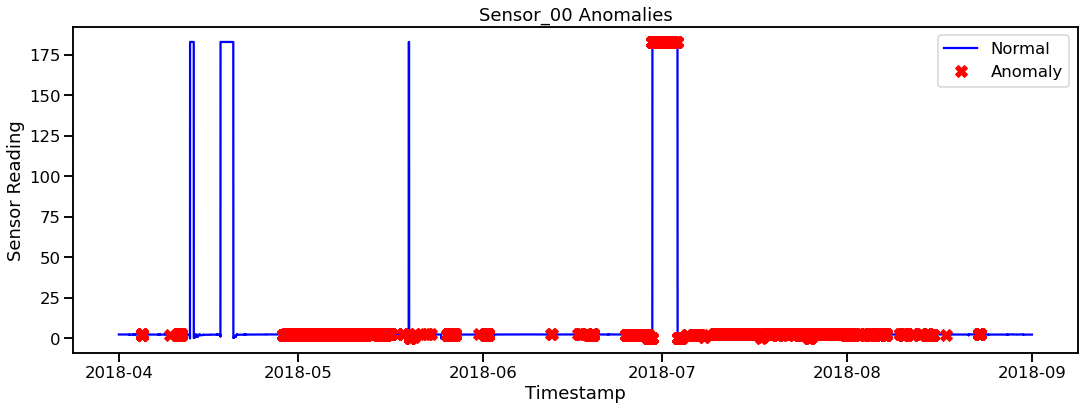

In [46]:
#plot
df['anomaly_IsolationForest'] = pd.Series(principalDf['anomaly_IsolationForest'].values, index=df.index)
anomaly = df.loc[df['anomaly_IsolationForest'] == -1] #anomaly
plt.figure(figsize=(18,6))
plt.plot(df['sensor_00'], color='blue', label='Normal')
plt.plot(anomaly['sensor_00'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
plt.xlabel('Timestamp')
plt.ylabel('Sensor Reading')
plt.title('Sensor_00 Anomalies')
plt.legend(loc='best')
plt.show()

# Model comparison
- On comparing the the plots of IQR, k-means and Isolation forest visually, IQR is able to recognise the the anomalies much better than the other 2 approches.
- We will now calculate the number of anomalies actually detected by these approches

## Isolation forest

In [47]:
df['anomaly_IsolationForest'].value_counts()
# normal +1
# anomalies -1

 1    191503
-1     28613
Name: anomaly_IsolationForest, dtype: int64

In [48]:
#We will check how the data points which is  marked as normal in dataset marked by anomalies 
df[df['anomaly_IsolationForest']==1]['machine_status'].value_counts()

NORMAL        178873
RECOVERING     12624
BROKEN             6
Name: machine_status, dtype: int64

In [49]:
#Actual machine status
df['machine_status'].value_counts()

NORMAL        205637
RECOVERING     14472
BROKEN             7
Name: machine_status, dtype: int64

## K- means

In [50]:
#Anomalies detected by kmeans
df['anomaly_kmeans'].value_counts()

0    191501
1     28615
Name: anomaly_kmeans, dtype: int64

In [51]:
#We will check how the data points which is  marked as normal in dataset marked by anomalies 
df[df['anomaly_kmeans']==1]['machine_status'].value_counts()

NORMAL        26806
RECOVERING     1808
BROKEN            1
Name: machine_status, dtype: int64

In [52]:
#Actual machine status
df['machine_status'].value_counts()

NORMAL        205637
RECOVERING     14472
BROKEN             7
Name: machine_status, dtype: int64

## IQR

In [53]:
df['anomaly_pc1'].value_counts()

0    190014
1     30102
Name: anomaly_pc1, dtype: int64

On comparing the statistics, IQR is recognisisng more number of anomalies compared to other 2 approches.